# I. Importing the 4 datasets to Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
pos_data_df = pd.read_excel('POS_DATA.xlsx')

In [3]:
pos_data_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12


In [4]:
loyalty_df = pd.read_excel("LOYALTY.xlsx")

In [5]:
loyalty_df.head()

,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0
1,9164011076155,72.0,Female,NaN,2.0,0.0
2,9162001049684,60.0,Female,NaN,1.0,0.0
3,9162005608405,NaN,Female,Married,5.0,NaN
4,9163002257856,50.0,Female,NaN,1.0,0.0


In [6]:
barcode_df = pd.read_excel("BARCODES.xlsx")

In [7]:
barcode_df.head()

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1


In [8]:
product_taxonomy_df = pd.read_excel("PRODUCT_TAXONOMY.xlsx")

In [9]:
product_taxonomy_df.head()

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea


# II. Preparing Data

## 1. POS_DATA Table:

#### 1.1 Checking if there's any missing values (and blanks) for all columns:

In [10]:
missing_value = pos_data_df.isnull().sum()
print(missing_value)

Basket_ID        0
Date             0
Barcode          0
Sum_Units        0
Sum_Value        0
Card_ID      86888
dtype: int64


In [11]:
pos_data_df.shape

(235474, 6)

NOTE: Not checking for any unique values here it's a point of sale data

In [12]:
#Placing a flag value for the missing values as -1
pos_data_df['Card_ID'].fillna(-1, inplace=True)

In [13]:
pos_data_df.head(10)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12
3,1106160983,41388,211069400000,1,0.749817,9.162006e+12
4,1108695491,41395,520286400380,2,0.600000,9.161004e+12
5,1089674734,41337,212878100000,1,3.808804,9.162007e+12
6,1100327962,41370,8716266,1,0.740015,9.164013e+12
7,1105798474,41387,211087700000,1,1.560235,9.162002e+12
8,1104570471,41383,520441601390,1,0.880000,9.163002e+12
9,1095466893,41355,520423930028,1,1.460015,-1.000000e+00


#### 1.2 Checking the data types of all the columns and converting to relevant data types

In [14]:
pos_data_df.dtypes

Basket_ID      int64
Date           int64
Barcode        int64
Sum_Units      int64
Sum_Value    float64
Card_ID      float64
dtype: object

1.2.1 Convert 'Date' column (which is in integer) to date type: (Solving using a reference date)

In [15]:
from datetime import datetime, timedelta

In [16]:
reference_date = datetime(1900, 1, 1) #YYYY-MM-DD

In [17]:
pos_data_df['Date'] = reference_date + pd.to_timedelta(pos_data_df['Date'], unit='D')

In [18]:
pos_data_df.head(15)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-17,800220505783,2,1.960000,9.160004e+12
1,1103853519,2013-04-19,520139501183,1,5.349993,9.164002e+12
2,1092750793,2013-03-15,520423907421,6,1.740015,9.164013e+12
3,1106160983,2013-04-26,211069400000,1,0.749817,9.162006e+12
4,1108695491,2013-05-03,520286400380,2,0.600000,9.161004e+12
5,1089674734,2013-03-06,212878100000,1,3.808804,9.162007e+12
6,1100327962,2013-04-08,8716266,1,0.740015,9.164013e+12
7,1105798474,2013-04-25,211087700000,1,1.560235,9.162002e+12
8,1104570471,2013-04-21,520441601390,1,0.880000,9.163002e+12
9,1095466893,2013-03-24,520423930028,1,1.460015,-1.000000e+00


1.2.2 Noticed Card_ID should be of int type, hence converting to int:

In [19]:
pos_data_df['Card_ID'] = pos_data_df['Card_ID'].astype('int64')

In [20]:
pos_data_df.head(25)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260
1,1103853519,2013-04-19,520139501183,1,5.349993,9164001986624
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351
5,1089674734,2013-03-06,212878100000,1,3.808804,9162006543842
6,1100327962,2013-04-08,8716266,1,0.740015,9164013172107
7,1105798474,2013-04-25,211087700000,1,1.560235,9162002290450
8,1104570471,2013-04-21,520441601390,1,0.880000,9163002317161
9,1095466893,2013-03-24,520423930028,1,1.460015,-1


In [21]:
pos_data_df.dtypes

Basket_ID             int64
Date         datetime64[ns]
Barcode               int64
Sum_Units             int64
Sum_Value           float64
Card_ID               int64
dtype: object

#### 1.3 Checking if there are any duplicate rows (transactions)

In [22]:
duplicates = pos_data_df.duplicated()
pos_data_df[duplicates]

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID


#### 1.4 Checking if there are any outliers (in this table, for sum_units and sum_value)

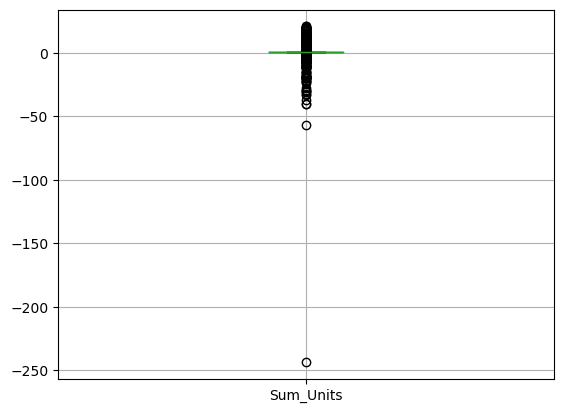

In [23]:
pos_data_df.boxplot(column=['Sum_Units'])
plt.show()

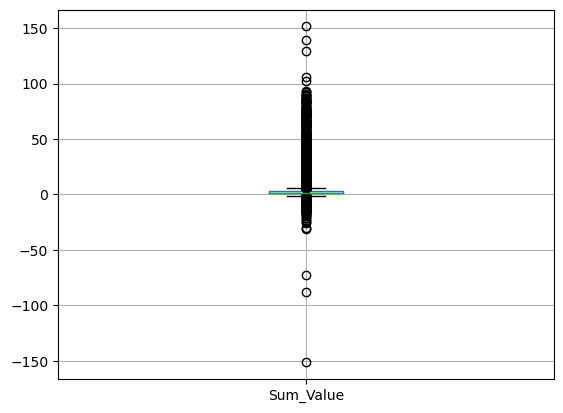

In [24]:
pos_data_df.boxplot(column=['Sum_Value'])
plt.show()

As seen there are outliers. Based on clustering -> will handle it later.

In [25]:
#pos_data_df.describe()

#### 1.5 Checking Data Integrity:

1.5.1 Between 'Card_ID' in the POS DATA table and 'CardholderID' in the LOYALTY table

In [26]:
filtered_pos_data_df = pos_data_df[pos_data_df['Card_ID'] != -1]
card_id_integrity = filtered_pos_data_df['Card_ID'].isin(loyalty_df['CardholderID'])
mismatched_ids = filtered_pos_data_df[~card_id_integrity]
mismatched_ids

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID


1.5.2 Between 'Barcodes' in POS DATA vs. 'Barcode' in BAR CODE

In [27]:
barcode_integrity = pos_data_df['Barcode'].isin(barcode_df['Barcode'])
mismatched_barcodes = pos_data_df[~barcode_integrity]
mismatched_barcodes

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
13,1093956996,2013-03-18,213227800000,1,1.991343,-1
139,1097180152,2013-03-30,210267300000,1,3.758885,9160002071369
297,1098420452,2013-04-03,213355000000,1,2.509934,9160002071789
503,1104574535,2013-04-21,213488900000,1,2.988613,9164014016844
524,1102661205,2013-04-15,520133517080,1,1.600000,9164005688937
...,...,...,...,...,...,...
234996,1093471769,2013-03-17,213488700000,1,1.170565,9162002155599
235027,1099543878,2013-04-06,213355000000,1,3.039589,9164010424568
235307,1091147556,2013-03-10,212790700000,1,2.990990,9164013043957
235416,1105014934,2013-04-22,212491500000,1,4.059457,-1


CONLUSION: 2227 rows of Barcode in POS Data Table weren't found in the Barcode table. 
Based on the use cases below, will be handled.  

1.5.3 Checking if there are any negative values in Sum_units or Sum_values

In [28]:
# Filter out the rows where either Sum_Units or Sum_Value are negative
#Saving this data in a dataframe called - return data
return_data_df = pos_data_df[(pos_data_df['Sum_Units'] < 0) | (pos_data_df['Sum_Value'] < 0)]

In [29]:
return_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
304,1100772313,2013-04-10,871811760118,-1,-15.450007,-1
1494,1109150120,2013-05-04,520200100008,-3,-2.370007,-1
2441,1092748527,2013-03-15,301426021665,-1,-2.890007,-1
2547,1096377503,2013-03-28,520115617239,-1,-0.349993,-1
4363,1104596556,2013-04-21,520105707103,-1,-1.700015,-1
...,...,...,...,...,...,...
233676,1105406137,2013-04-24,841020711586,-1,-3.200000,-1
233743,1107356470,2013-04-29,500012716281,-1,-3.300015,-1
233879,1099544344,2013-04-06,940,-6,-0.840000,-1
234733,1105015678,2013-04-22,211050000000,-1,-10.291064,-1


We see 528 records  with negative values, which means customer's have returned some items, so for our analysis, instead of ignoring them, we do the summation of the total units and value to each Basket ID in the later section while defining the features.

In [30]:
len(pos_data_df['Basket_ID'].unique())

46457

#### 1.6 Checking if any data aggregation can be done

We can check how much each customer has spent? Can check by using Card_ID

In [31]:
customer_totals = pos_data_df.groupby('Card_ID').agg({'Sum_Value': 'sum', 'Sum_Units': 'sum'}).reset_index()
customer_totals.columns = ['CARD_ID', 'Total_Sum_Value', 'Total_Sum_Units']
customer_totals

,CARD_ID,Total_Sum_Value,Total_Sum_Units
0,-1,197244.355747,108259
1,9160000047700,171.080323,52
2,9160000072177,139.012415,21
3,9160000108180,73.947205,1
4,9160000137227,129.671166,42
...,...,...,...
4395,9164017704649,16.340015,11
4396,9164017711777,33.427939,28
4397,9164017716109,2.730007,1
4398,9164017898218,12.391577,6


Since -1 involved, here's one without missing values and with the card holder's only

In [32]:
filtered_data_df = pos_data_df[pos_data_df['Card_ID'] != -1]
customer_totals_2 = filtered_data_df.groupby('Card_ID').agg({'Sum_Value': 'sum', 'Sum_Units': 'sum'}).reset_index()
customer_totals_2.columns = ['CARD_ID', 'Total_Sum_Value', 'Total_Sum_Units']
customer_totals_2

,CARD_ID,Total_Sum_Value,Total_Sum_Units
0,9160000047700,171.080323,52
1,9160000072177,139.012415,21
2,9160000108180,73.947205,1
3,9160000137227,129.671166,42
4,9160000168443,38.923346,21
...,...,...,...
4394,9164017704649,16.340015,11
4395,9164017711777,33.427939,28
4396,9164017716109,2.730007,1
4397,9164017898218,12.391577,6


CONCLUSION: From the above we can get to know a single Card_ID total expenditure and can relate to Loyalty Table (Customer Demographs).

## 2. LOYALTY Table:

#### 2.1 Checking if there's any missing values for all columns

In [33]:
missing_value = loyalty_df.isnull().sum()
print(missing_value)

CardholderID          0
Age               80976
Gender            18934
MaritalStatus    153385
HouseholdSize     19095
Children          19678
dtype: int64


There are a lot of columns with missing data, need to fill in the gaps - 

For Age: Replacing with the median age.
For Gender: Replacing with a placeholder like -"Not Specified". 
For MaritalStatus: Replacing with "Unknown".
For HouseholdSize: Replace with the median.
For Children: Replacing with the median.

But for gender we should have male, female or Unknown, we check that and we clean them accordingly before we replace only the empty field

In [34]:
print(loyalty_df['Gender'].unique())

['Male' 'Female' 'Unknown' nan 'Fake Names' 'Company']


Here, we see so many different gender's - so converting not specified, unkown, Fake names, company - to single category - Unkown

In [35]:
#List of values to be replaced
replace_values = ['Unknown', 'Fake Names', 'Company', pd.NA, 'Not Specified']

#Replacing the values
loyalty_df['Gender'] = loyalty_df['Gender'].replace(replace_values, 'Unknown')

#Checking loyalty gender values
print(loyalty_df['Gender'].value_counts())

Gender
Female     96699
Male       69169
Unknown    25261
Name: count, dtype: int64


In [36]:
loyalty_df['Age'].fillna(loyalty_df['Age'].median(), inplace=True)
loyalty_df['MaritalStatus'].fillna('Unknown', inplace=True)
loyalty_df['HouseholdSize'].fillna(loyalty_df['HouseholdSize'].median(), inplace=True)
loyalty_df['Children'].fillna(loyalty_df['Children'].median(), inplace=True)

In [37]:
print(loyalty_df['Gender'].value_counts())

Gender
Female     96699
Male       69169
Unknown    25261
Name: count, dtype: int64


#### 2.2 Checking the data types of all the columns and converting to relevant data types

In [38]:
loyalty_df.dtypes

CardholderID       int64
Age              float64
Gender            object
MaritalStatus     object
HouseholdSize    float64
Children         float64
dtype: object

In [39]:
#Converting age, children and householdSize to int
loyalty_df['Age'] = loyalty_df['Age'].astype(int)
loyalty_df['Children'] = loyalty_df['Children'].astype(int)
loyalty_df['HouseholdSize'] = loyalty_df['HouseholdSize'].astype(int)

In [40]:
loyalty_df.dtypes

CardholderID      int64
Age               int32
Gender           object
MaritalStatus    object
HouseholdSize     int32
Children          int32
dtype: object

#### 2.3 Checking if there are any duplicate rows 

In [41]:
duplicates_loyalty = loyalty_df.duplicated()
print(loyalty_df[duplicates_loyalty])

Empty DataFrame
Columns: [CardholderID, Age, Gender, MaritalStatus, HouseholdSize, Children]
Index: []


#### 2.4 Checking if there are any outliers

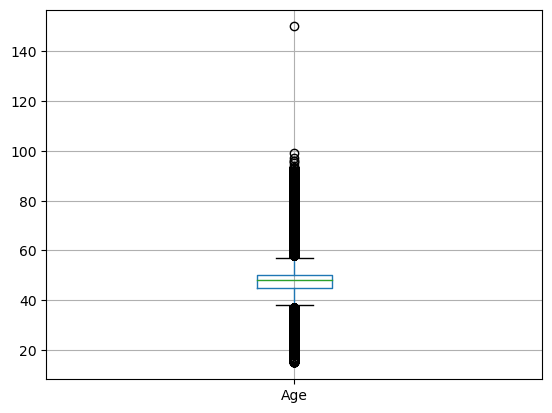

In [42]:
#Using boxplot for visualizing potential outliers for Age
loyalty_df.boxplot(column=['Age'])
plt.show()

Outliers will be handled based on the basket and customer segmentation later.

#### 2.5 Data Aggregation for LOYALTY table:

In [43]:
#Aggregate Age Range:
bins = [0, 18, 35, 50, 65, 100]
labels = ['<18', '18-35', '36-50', '51-65', '>65']
loyalty_df['AgeGroup'] = pd.cut(loyalty_df['Age'], bins=bins, labels=labels, right=False)
age_group_distribution = loyalty_df.groupby('AgeGroup').size().reset_index(name='Count')
print(age_group_distribution)

  AgeGroup   Count
0      <18      79
1    18-35   16510
2    36-50  124812
3    51-65   31242
4      >65   18485


#### 2.6 Checking Data Integrity

2.6.1 For 'HouseholdSize' and 'Children' (a household size of 1 with more than 0 children - ?)

In [44]:
inconsistent_households = loyalty_df[(loyalty_df['HouseholdSize'] == 1) & (loyalty_df['Children'] > 0)]
print(inconsistent_households)

Empty DataFrame
Columns: [CardholderID, Age, Gender, MaritalStatus, HouseholdSize, Children, AgeGroup]
Index: []


2.6.2 Check Gender Consistency:

In [45]:
print(loyalty_df['Gender'].value_counts())

Gender
Female     96699
Male       69169
Unknown    25261
Name: count, dtype: int64


2.6.3 Check Marital Status Consistency:

In [46]:
print(loyalty_df['MaritalStatus'].value_counts())

MaritalStatus
Unknown            153385
Married             28552
Single (Alone)       6109
Single (Family)      2028
Divorced              668
Widow/Widower         387
Name: count, dtype: int64


## 3 BARCODES Table:

#### 3.1 Checking if there's any missing values for all columns:

In [47]:
missing_value_barcode = barcode_df.isnull().sum()
print(missing_value_barcode)

Barcode      0
CategoryA    0
CategoryB    0
CategoryC    0
CategoryD    0
dtype: int64


#### 3.2 Checking the data types of all columns:

In [48]:
barcode_df.dtypes

Barcode      int64
CategoryA    int64
CategoryB    int64
CategoryC    int64
CategoryD    int64
dtype: object

#### 3.3 Checking if there are any duplicate rows:

In [49]:
duplicates_barcode = barcode_df.duplicated()
print(barcode_df[duplicates_barcode])

Empty DataFrame
Columns: [Barcode, CategoryA, CategoryB, CategoryC, CategoryD]
Index: []


#### 3.4 No outliers to check in this table has categorical data

#### 3.5 Data Integrity 

3.4.1 Checking if there's any duplicate barcde

In [50]:
duplicated_barcodes = barcode_df[barcode_df['Barcode'].duplicated()]
print(duplicated_barcodes)

Empty DataFrame
Columns: [Barcode, CategoryA, CategoryB, CategoryC, CategoryD]
Index: []


3.4.2 Checking for mismatched category values:

In [51]:
def check_category_integrity(column_name):
    mismatched_values = barcode_df[~barcode_df[column_name].isin(product_taxonomy_df[column_name])]
    return mismatched_values

mismatched_a = check_category_integrity('CategoryA')
mismatched_b = check_category_integrity('CategoryB')
mismatched_c = check_category_integrity('CategoryC')
mismatched_d = check_category_integrity('CategoryD')

print("Mismatched values:", mismatched_a)

Mismatched values: Empty DataFrame
Columns: [Barcode, CategoryA, CategoryB, CategoryC, CategoryD]
Index: []


In [52]:
print("Mismatched values:", mismatched_b)

Mismatched values:            Barcode  CategoryA  CategoryB  CategoryC  CategoryD
52    212721800000         20         58         72          2
221   520205301039         20         58         75          2
697   520205300209         20         58         75          2
1384  360923069287         60         42        569          1
2289  520205300206         20         58         75          2
2439  520205300215         20         58         75          2
4263  520205302025         20         58         75          4
5247  520205300208         20         58         75          2
8580  520205300126         20         58         75          2
8872  520205306008         20         58         75          2
8960  520205306010         20         58         75          2


In [53]:
print("Mismatched values:", mismatched_c)

Mismatched values:            Barcode  CategoryA  CategoryB  CategoryC  CategoryD
52    212721800000         20         58         72          2
221   520205301039         20         58         75          2
320   212846800000         20         57        134          1
576   541065100784         30         27         92          2
697   520205300209         20         58         75          2
716   213503100000         20         53        153          2
1384  360923069287         60         42        569          1
2289  520205300206         20         58         75          2
2382  210452200000         20         53        153          1
2439  520205300215         20         58         75          2
3741  212874100000         20         53        153          2
4263  520205302025         20         58         75          4
5247  520205300208         20         58         75          2
5806  213503000000         20         53        153          2
7257  520423929489         20       

In [54]:
print("Mismatched values:", mismatched_d)

Mismatched values:           Barcode  CategoryA  CategoryB  CategoryC  CategoryD
129  360923056844         60         60        783         19
266  210553300000         20         56        181         15


In [55]:
missing_value_taxonomy = product_taxonomy_df.isnull().sum()
print(missing_value_taxonomy)

CategoryA               0
CategoryB               0
CategoryBDescription    0
CategoryC               0
CategoryCDescription    0
CategoryD               0
CategoryDDescription    0
dtype: int64


We can see there are many mistmatches in the category -> some categories in the barcode table does not match the product taxonomy table - as the PT table is complete with no missing values (so we are considering that as our base reference)

Now we check the barcode to the POS table barcodes for more understanding

In [56]:
def check_existence_in_pos(mismatched_df):
    #Extracting barcodes from the mismatched dataframe
    mismatched_barcodes = mismatched_df['Barcode'].unique()
    
    #Checking if they exist in the POS DATA dataframe
    exists_in_pos = pos_data_df['Barcode'].isin(mismatched_barcodes)
    
    return pos_data_df[exists_in_pos]

#Checking existence for mismatched_b, mismatched_c, and mismatched_d
exists_in_pos_b = check_existence_in_pos(mismatched_b)
exists_in_pos_c = check_existence_in_pos(mismatched_c)
exists_in_pos_d = check_existence_in_pos(mismatched_d)

#Printing the results
print("Barcodes from mismatched_b in POS DATA:", exists_in_pos_b['Barcode'].unique())
print("Barcodes from mismatched_c in POS DATA:", exists_in_pos_c['Barcode'].unique())
print("Barcodes from mismatched_d in POS DATA:", exists_in_pos_d['Barcode'].unique())

Barcodes from mismatched_b in POS DATA: [212721800000 520205306008 520205300208 520205300126 520205300209
 520205302025 520205306010 520205300206 520205301039 520205300215
 360923069287]
Barcodes from mismatched_c in POS DATA: [212721800000 213503100000 213503000000 520205306008 212846800000
 520205300208 210452200000 520205300126 520205300209 520205302025
 520205306010 520205300206 520423929489 520205301039 213255500000
 212348400000 520205300215 541065100784 360923069287 212874100000]
Barcodes from mismatched_d in POS DATA: [210553300000 360923056844]


##### From the above we can note that those mismatched barcode categories exist in the POS table, so we can conclude that there is some inconsistency (incomplete values) in product taxonomy when compared to POS data and Barcode table

### NOTE: For POS_DATA table and BARCODES table, we see the barcodes size isn't consistent, so we make them all 12 digits (by adding 0's in the end):

In [57]:
def standardize_barcodes(df, barcode_column):
    df[barcode_column] = df[barcode_column].astype(str).str.pad(width=12, side='right', fillchar='0')
    return df

# Applying the function to each DataFrame
pos_data_df = standardize_barcodes(pos_data_df, 'Barcode') 
barcode_df = standardize_barcodes(barcode_df, 'Barcode')

In [58]:
pos_data_df.head(50)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260
1,1103853519,2013-04-19,520139501183,1,5.349993,9164001986624
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351
5,1089674734,2013-03-06,212878100000,1,3.808804,9162006543842
6,1100327962,2013-04-08,871626600000,1,0.740015,9164013172107
7,1105798474,2013-04-25,211087700000,1,1.560235,9162002290450
8,1104570471,2013-04-21,520441601390,1,0.880000,9163002317161
9,1095466893,2013-03-24,520423930028,1,1.460015,-1


In [59]:
pos_data_df.shape

(235474, 6)

## 4. PRODUCT_TAXONOMY Table:

#### 4.1 Checking if there's any missing values

In [60]:
missing_value_taxonomy = product_taxonomy_df.isnull().sum()
print(missing_value_taxonomy)

CategoryA               0
CategoryB               0
CategoryBDescription    0
CategoryC               0
CategoryCDescription    0
CategoryD               0
CategoryDDescription    0
dtype: int64


#### 4.2 Checking the data types of all columns:

In [61]:
product_taxonomy_df.dtypes

CategoryA                int64
CategoryB                int64
CategoryBDescription    object
CategoryC                int64
CategoryCDescription    object
CategoryD                int64
CategoryDDescription    object
dtype: object

#### 4.3 Checking for duplicates:

In [62]:
duplicates_taxonomy = product_taxonomy_df.duplicated()
print(product_taxonomy_df[duplicates_taxonomy])

Empty DataFrame
Columns: [CategoryA, CategoryB, CategoryBDescription, CategoryC, CategoryCDescription, CategoryD, CategoryDDescription]
Index: []


#### 4.4 No outliers to check in this table has categorical data.

#### 4.5 - Data Integrity 

In [63]:
#Checking if Category A values in BARCODE table are present in PRODUCT TAXONOMY table
categoryA_integrity = barcode_df['CategoryA'].isin(product_taxonomy_df['CategoryA'])
mismatched_categoryA = barcode_df[~categoryA_integrity]
print(mismatched_categoryA)

Empty DataFrame
Columns: [Barcode, CategoryA, CategoryB, CategoryC, CategoryD]
Index: []


In [64]:
#Similarly doing the same checks for Category B,C,D vales in BARcode table are present in Prod taxonomoy table
categoryB_integrity = barcode_df['CategoryB'].isin(product_taxonomy_df['CategoryB'])
mismatched_categoryB = barcode_df[~categoryB_integrity]
print(mismatched_categoryB)

           Barcode  CategoryA  CategoryB  CategoryC  CategoryD
52    212721800000         20         58         72          2
221   520205301039         20         58         75          2
697   520205300209         20         58         75          2
1384  360923069287         60         42        569          1
2289  520205300206         20         58         75          2
2439  520205300215         20         58         75          2
4263  520205302025         20         58         75          4
5247  520205300208         20         58         75          2
8580  520205300126         20         58         75          2
8872  520205306008         20         58         75          2
8960  520205306010         20         58         75          2


In [65]:
categoryC_integrity = barcode_df['CategoryC'].isin(product_taxonomy_df['CategoryC'])
mismatched_categoryC = barcode_df[~categoryC_integrity]
print(mismatched_categoryC)

           Barcode  CategoryA  CategoryB  CategoryC  CategoryD
52    212721800000         20         58         72          2
221   520205301039         20         58         75          2
320   212846800000         20         57        134          1
576   541065100784         30         27         92          2
697   520205300209         20         58         75          2
716   213503100000         20         53        153          2
1384  360923069287         60         42        569          1
2289  520205300206         20         58         75          2
2382  210452200000         20         53        153          1
2439  520205300215         20         58         75          2
3741  212874100000         20         53        153          2
4263  520205302025         20         58         75          4
5247  520205300208         20         58         75          2
5806  213503000000         20         53        153          2
7257  520423929489         20         55        173    

In [66]:
categoryD_integrity = barcode_df['CategoryD'].isin(product_taxonomy_df['CategoryD'])
mismatched_categoryD = barcode_df[~categoryD_integrity]
print(mismatched_categoryD)

          Barcode  CategoryA  CategoryB  CategoryC  CategoryD
129  360923056844         60         60        783         19
266  210553300000         20         56        181         15


##### We had already concluded from the data integrity check of BARCODE table that there are inconsistencies in product taxonomy in comparision to the other tables

### HANDLING THE INCONSISTENCY IN PRODUCT TAXONOMY: 

Adding "Miscellaneous" entry in the PRODUCT TAXOMONY table for the new category "-1" across all category levels and then updating the barcode table to make sure data is consistent:

The new row that will be added will have this data:'CategoryA': -1,'CategoryB': -1, 'CategoryBDescription': 'Miscellaneous', 'CategoryC': -1, 'CategoryCDescription': 'Miscellaneous','CategoryD': -1, 'CategoryDDescription': 'Miscellaneous'

In [67]:
product_taxonomy_df.loc[len(product_taxonomy_df)] = [-1, -1, 'Miscellaneous', -1, 'Miscellaneous', -1, 'Miscellaneous']

In [68]:
product_taxonomy_df

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea
...,...,...,...,...,...,...,...
699,90,91,telephone,912,AIR TIME COSMOTE,1,AIR TIME COSMOTE
700,90,91,telephone,913,AIR TIME Q,1,AIR TIME Q
701,90,91,telephone,916,AIR TIME OTENET,1,AIR TIME OTENET
702,90,91,telephone,920,prepaid card,1,prepaid card


In [69]:
def update_barcode_to_miscellaneous(barcode_df, column_name, mismatched_values):
    barcode_df.loc[barcode_df[column_name].isin(mismatched_values), column_name] = -1
    return barcode_df

#Define the mismatched barcode values based on the provided output
mismatched_b_values = [212721800000, 520205306008, 520205300208, 520205300126, 520205300209,
                       520205302025, 520205306010, 520205300206, 520205301039, 520205300215,
                       360923069287]

mismatched_c_values = [212721800000, 213503100000, 213503000000, 520205306008, 212846800000,
                       520205300208, 210452200000, 520205300126, 520205300209, 520205302025,
                       520205306010, 520205300206, 520423929489, 520205301039, 213255500000,
                       212348400000, 520205300215, 541065100784, 360923069287, 212874100000]

mismatched_d_values = [210553300000, 360923056844]

barcode_df = update_barcode_to_miscellaneous(barcode_df, 'CategoryB', mismatched_b_values)
barcode_df = update_barcode_to_miscellaneous(barcode_df, 'CategoryC', mismatched_c_values)
barcode_df = update_barcode_to_miscellaneous(barcode_df, 'CategoryD', mismatched_d_values)

In [70]:
barcode_df.head(50)

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1
5,520121945559,10,14,216,2
6,520114314859,10,12,287,4
7,520423913027,10,12,286,7
8,871478945708,10,12,285,4
9,520103750454,30,21,8,4


# III. Features for analysis

In [71]:
#Handling the negative values for sum_units and sum_values
#Calculating Net Sum Values
net_values = pos_data_df.groupby('Basket_ID').agg({'Sum_Units': 'sum', 'Sum_Value': 'sum'}).reset_index()
net_values.rename(columns={'Sum_Units': 'Sum_Units_Net', 'Sum_Value': 'Sum_Value_Net'}, inplace=True)

#Merging the Net Values into merged_data_df
merged_data_df = pd.merge(pos_data_df, net_values, on='Basket_ID', how='left')

In [72]:
merged_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260,19,27.399442
1,1103853519,2013-04-19,520139501183,1,5.349993,9164001986624,1,5.349993
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385,11,6.100161
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409,8,10.581335
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351,9,11.910022
...,...,...,...,...,...,...,...,...
235469,1093498033,2013-03-17,210996300000,1,4.040059,9164013170608,2,6.240440
235470,1102688274,2013-04-15,520423909932,1,1.000000,9162000154457,2,1.810007
235471,1089686077,2013-03-06,210757000000,1,1.330066,9164003804728,15,50.327308
235472,1099519315,2013-04-06,520423915759,2,3.180015,-1,8,23.754365


In [73]:
num_unique_baskets = len(merged_data_df['Basket_ID'].unique())
print("Number of unique Basket_IDs:", num_unique_baskets)

sorted_merged_data_df = merged_data_df.sort_values(by='Basket_ID')

sorted_merged_data_df.head(50)

Number of unique Basket_IDs: 46457


,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net
16035,1089674688,2013-03-06,213353900000,1,3.029318,9164010633984,2,4.669318
54301,1089674688,2013-03-06,520217800009,1,1.640000,9164010633984,2,4.669318
130078,1089674689,2013-03-06,520423931812,2,1.980015,9160002070041,6,3.590022
94366,1089674689,2013-03-06,520423916709,2,0.160000,9160002070041,6,3.590022
60478,1089674689,2013-03-06,520423911676,1,0.460015,9160002070041,6,3.590022
53533,1089674689,2013-03-06,520103750028,1,0.989993,9160002070041,6,3.590022
113494,1089674690,2013-03-06,520033731050,1,2.000000,-1,2,3.000000
189514,1089674690,2013-03-06,520257500346,1,1.000000,-1,2,3.000000
95391,1089674691,2013-03-06,210244800000,1,5.781600,9164010909515,13,16.442612
5490,1089674691,2013-03-06,520136052011,6,4.560000,9164010909515,13,16.442612


### Average Unit Price per Basket

In [74]:
#Average Unit Price per Basket - the average price per item in a basket provides insights into the types of products customers are purchasing
merged_data_df['Avg_Unit_Price'] = merged_data_df['Sum_Value'] / merged_data_df['Sum_Units']

### Distinct Item Count per Basket

In [75]:
#Distinct item count - Number of distinct items in a basket
distinct_item_count = merged_data_df.groupby('Basket_ID')['Barcode'].nunique().reset_index()
distinct_item_count.rename(columns={'Barcode': 'Distinct_Item_Count'}, inplace=True)
merged_data_df = pd.merge(merged_data_df, distinct_item_count, on='Basket_ID', how='left')

In [76]:
#Merging merged_data_df with barcode_df on 'Barcode'
merged_data_df = pd.merge(merged_data_df, barcode_df, on='Barcode', how='left')

### Frequency of Visits

In [77]:
#Frequency of visits by the customer
visit_frequency = merged_data_df.groupby('Card_ID')['Date'].nunique().reset_index()
visit_frequency.rename(columns={'Date': 'Visit_Frequency'}, inplace=True)
merged_data_df = pd.merge(merged_data_df, visit_frequency, on='Card_ID', how='left')

### Basket Diversity Score

In [78]:
merged_data_df['Combined_Category'] = merged_data_df.apply(lambda x: (x['CategoryA'], x['CategoryB'], x['CategoryC'], x['CategoryD']), axis=1)

In [79]:
merged_data_df['Basket_Diversity_Score'] = merged_data_df.groupby('Basket_ID')['Combined_Category'].transform('nunique')

### Time of Purchase

In [80]:
#Whether the purchase was made on a weekend or weekday
merged_data_df['Weekday'] = merged_data_df['Date'].dt.dayofweek
merged_data_df['Is_Weekend'] = merged_data_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

### Joining with loyalty data for Customer Demographic Features

In [81]:
merged_data_df = pd.merge(merged_data_df, loyalty_df, left_on='Card_ID', right_on='CardholderID', how='left')

#### Checking the new columns on merged_data_df

In [82]:
merged_data_df.columns

Index(['Basket_ID', 'Date', 'Barcode', 'Sum_Units', 'Sum_Value', 'Card_ID',
       'Sum_Units_Net', 'Sum_Value_Net', 'Avg_Unit_Price',
       'Distinct_Item_Count', 'CategoryA', 'CategoryB', 'CategoryC',
       'CategoryD', 'Visit_Frequency', 'Combined_Category',
       'Basket_Diversity_Score', 'Weekday', 'Is_Weekend', 'CardholderID',
       'Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children',
       'AgeGroup'],
      dtype='object')

In [83]:
#Option to display all columns (None means no limit)
pd.set_option('display.max_columns', None)

In [84]:
#Remove redundant columns
columns_to_drop = ['CardholderID']
merged_data_df = merged_data_df.drop(columns=columns_to_drop)

### Loyalty Customer's or not Check: 

In [85]:
#The value is 0 if Card_ID is -1 (not a loyalty member), and 1 otherwise -> 0 is not a member, 1 is a member
merged_data_df['Is_Loyalty_Member'] = merged_data_df['Card_ID'].apply(lambda x: 0 if x == -1 else 1)

In [86]:
merged_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net,Avg_Unit_Price,Distinct_Item_Count,CategoryA,CategoryB,CategoryC,CategoryD,Visit_Frequency,Combined_Category,Basket_Diversity_Score,Weekday,Is_Weekend,Age,Gender,MaritalStatus,HouseholdSize,Children,AgeGroup,Is_Loyalty_Member
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260,19,27.399442,0.980000,11,10.0,14.0,239.0,2.0,1,"(10.0, 14.0, 239.0, 2.0)",5,2,0,54.0,Female,Unknown,2.0,0.0,51-65,1
1,1103853519,2013-04-19,520139501183,1,5.349993,9164001986624,1,5.349993,5.349993,1,10.0,12.0,281.0,1.0,9,"(10.0, 12.0, 281.0, 1.0)",1,4,0,52.0,Unknown,Married,3.0,2.0,51-65,1
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385,11,6.100161,0.290002,6,10.0,14.0,239.0,2.0,23,"(10.0, 14.0, 239.0, 2.0)",6,4,0,48.0,Female,Unknown,1.0,0.0,36-50,1
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409,8,10.581335,0.749817,8,20.0,56.0,183.0,9.0,1,"(20.0, 56.0, 183.0, 9.0)",6,4,0,72.0,Female,Unknown,1.0,0.0,>65,1
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351,9,11.910022,0.300000,8,40.0,31.0,316.0,1.0,10,"(40.0, 31.0, 316.0, 1.0)",7,4,0,51.0,Female,Unknown,1.0,0.0,51-65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235514,1093498033,2013-03-17,210996300000,1,4.040059,9164013170608,2,6.240440,4.040059,2,20.0,56.0,181.0,11.0,6,"(20.0, 56.0, 181.0, 11.0)",2,6,1,48.0,Unknown,Unknown,1.0,0.0,36-50,1
235515,1102688274,2013-04-15,520423909932,1,1.000000,9162000154457,2,1.810007,1.000000,2,10.0,14.0,201.0,1.0,13,"(10.0, 14.0, 201.0, 1.0)",2,0,0,48.0,Unknown,Unknown,1.0,0.0,36-50,1
235516,1089686077,2013-03-06,210757000000,1,1.330066,9164003804728,15,50.327308,1.330066,12,20.0,56.0,183.0,11.0,4,"(20.0, 56.0, 183.0, 11.0)",12,2,0,77.0,Male,Unknown,3.0,0.0,>65,1
235517,1099519315,2013-04-06,520423915759,2,3.180015,-1,8,23.754365,1.590007,7,10.0,14.0,202.0,2.0,48,"(10.0, 14.0, 202.0, 2.0)",7,5,1,NaN,NaN,NaN,NaN,NaN,NaN,0


# IV. Basket Segmentation

Features from merged_data_df:
1. Avg_Unit_Price: Average price per item in a basket.
2. Basket_Diversity_Score: Number of unique categories in a basket.
3. Distinct_Item_Count: Number of distinct items in a basket.
4. Sum_Units_Net: Net total units in a basket after considering returns and exchanges.
5. Sum_Value_Net: Net total value of a basket after considering returns and exchanges.
6. Is _Weekend: Whether the purchase was made on a weekend.
7. Visit_Frequency: Frequency of visits by the customer.
8. Is_Loyalty_Member: Indicates if the customer is a member of the loyalty program (1 for members, 0 for non-members).

### Calculating the Pearson correlation matrix to check the correlation between features:

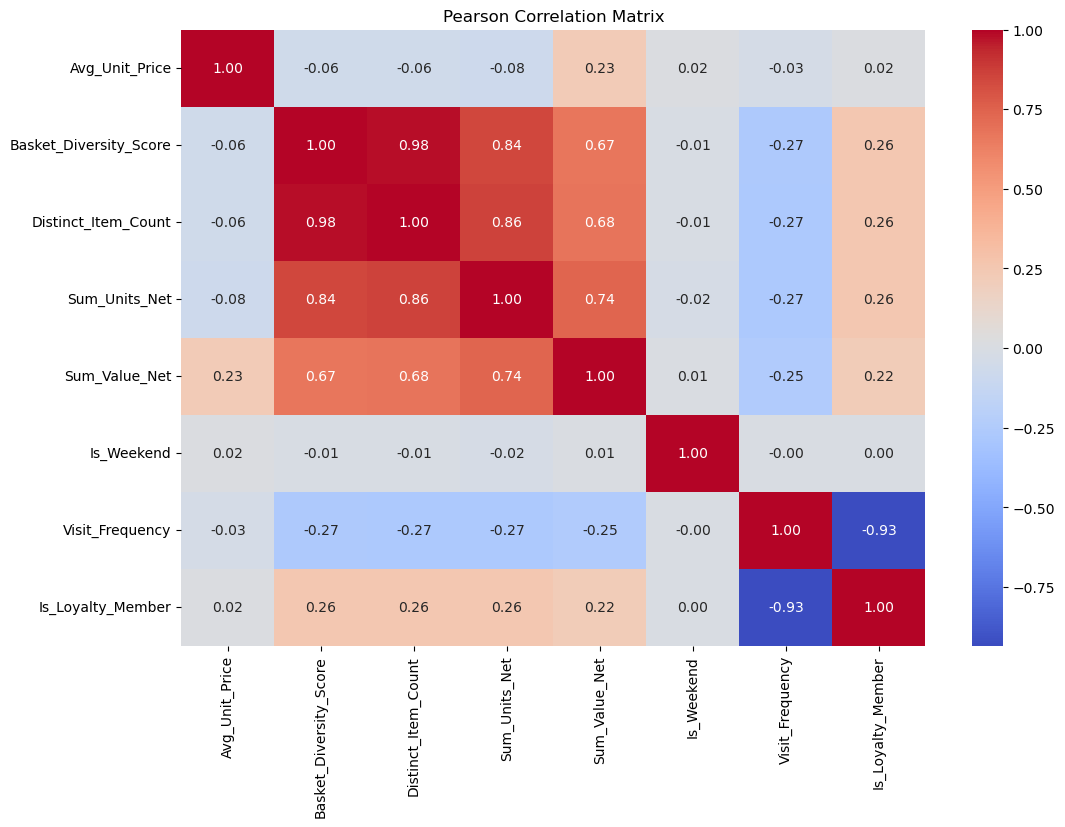

In [87]:
selected_columns = [
    'Avg_Unit_Price', 'Basket_Diversity_Score', 'Distinct_Item_Count', 
    'Sum_Units_Net', 'Sum_Value_Net', 
    'Is_Weekend', 'Visit_Frequency', 'Is_Loyalty_Member'
]

#Creating a new DataFrame with selected columns
correlation_data = merged_data_df[selected_columns]

#Calculating the Pearson correlation matrix
correlation_matrix = correlation_data.corr()

#Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [88]:
correlation_matrix

,Avg_Unit_Price,Basket_Diversity_Score,Distinct_Item_Count,Sum_Units_Net,Sum_Value_Net,Is_Weekend,Visit_Frequency,Is_Loyalty_Member
Avg_Unit_Price,1.000000,-0.062699,-0.064513,-0.075214,0.228719,0.016220,-0.028781,0.015866
Basket_Diversity_Score,-0.062699,1.000000,0.980957,0.843960,0.669158,-0.010430,-0.267710,0.258070
Distinct_Item_Count,-0.064513,0.980957,1.000000,0.862371,0.681870,-0.009886,-0.270039,0.257118
Sum_Units_Net,-0.075214,0.843960,0.862371,1.000000,0.737031,-0.020875,-0.274579,0.259563
Sum_Value_Net,0.228719,0.669158,0.681870,0.737031,1.000000,0.008063,-0.252549,0.215003
Is_Weekend,0.016220,-0.010430,-0.009886,-0.020875,0.008063,1.000000,-0.001435,0.001331
Visit_Frequency,-0.028781,-0.267710,-0.270039,-0.274579,-0.252549,-0.001435,1.000000,-0.933361
Is_Loyalty_Member,0.015866,0.258070,0.257118,0.259563,0.215003,0.001331,-0.933361,1.000000


Have kept Basket_Diversity_Score and removed Distinct_Item_Count mainly how as they are very similar and also due to their high correlation
Have kept Sum_Units_Net and Sum_Value_Net, as they represent different aspects of the transaction, even though they are quite correlated.
Have kept Visit_Frequency and Is_Loyalty_Member as well despite their high negative correlation. This is because they might independently contribute important insights into customer behavior. 
Is_Weekend is kept as it is not highly correlated with other variables.

In "Introduction to Data Mining" by Tan, Steinbach, and Kumar, I understood that K-means and other clustering methods are concerned with the distance between points in a multi-dimensional space. Since these methods do not find regression coefficients or perform any predictions, the issue of multicollinearity is not directly relevant, hence, based on the business assumptions - have kept some features but removed very similar ones. 

1. Basket_Diversity_Score
2. Sum_Value_Net
3. Sum_Units Net
4. Visit_Frequency
5. Is_Loyalty_Member
6. Is_Weekend
7. Avg Unit Price

In [89]:
Features = ['Basket_Diversity_Score', 
            'Sum_Value_Net',
            'Sum_Units_Net',
            'Visit_Frequency',
            'Is_Loyalty_Member',
            'Is_Weekend',
            'Avg_Unit_Price']

In [90]:
#Checking for missing values in the specified columns
missing_values = merged_data_df[Features].isnull().sum()
print(missing_values)

Basket_Diversity_Score    0
Sum_Value_Net             0
Sum_Units_Net             0
Visit_Frequency           0
Is_Loyalty_Member         0
Is_Weekend                0
Avg_Unit_Price            0
dtype: int64


#### Removing outliers in the Features

In [91]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Filtering out the outliers
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return filtered_df

In [92]:
original_shape = merged_data_df.shape

for feature in Features:
    merged_data_df = remove_outliers(merged_data_df, feature)

#Now merged_data_df has had outliers removed feature by feature
new_shape = merged_data_df.shape

print(f"Original dataframe shape: {original_shape}")
print(f"Dataframe shape after outlier removal: {new_shape}")

Original dataframe shape: (235519, 26)
Dataframe shape after outlier removal: (211816, 26)


In [93]:
merged_data_df.shape

(211816, 26)

### K-Means clustering method 

In [94]:
#Extracting the selected features
Extract = merged_data_df[Features]

#Normalizing the features
scaler = StandardScaler()
Extract_scaled = scaler.fit_transform(Extract)

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.

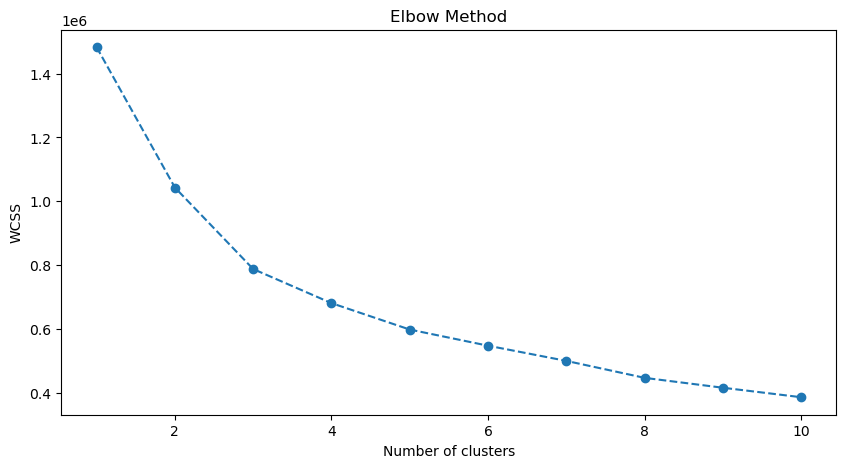

In [95]:
#Using Elbow Method to determine the number of clusters for kmeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Extract_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above k=3, as that's the point where the rate of decrease in WCSS starts to level off.

In [96]:
#Clustering the data
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
merged_data_df['BasketCluster'] = kmeans.fit_predict(Extract_scaled)

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [97]:
merged_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net,Avg_Unit_Price,Distinct_Item_Count,CategoryA,CategoryB,CategoryC,CategoryD,Visit_Frequency,Combined_Category,Basket_Diversity_Score,Weekday,Is_Weekend,Age,Gender,MaritalStatus,HouseholdSize,Children,AgeGroup,Is_Loyalty_Member,BasketCluster
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260,19,27.399442,0.980000,11,10.0,14.0,239.0,2.0,1,"(10.0, 14.0, 239.0, 2.0)",5,2,0,54.0,Female,Unknown,2.0,0.0,51-65,1,2
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385,11,6.100161,0.290002,6,10.0,14.0,239.0,2.0,23,"(10.0, 14.0, 239.0, 2.0)",6,4,0,48.0,Female,Unknown,1.0,0.0,36-50,1,1
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409,8,10.581335,0.749817,8,20.0,56.0,183.0,9.0,1,"(20.0, 56.0, 183.0, 9.0)",6,4,0,72.0,Female,Unknown,1.0,0.0,>65,1,1
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351,9,11.910022,0.300000,8,40.0,31.0,316.0,1.0,10,"(40.0, 31.0, 316.0, 1.0)",7,4,0,51.0,Female,Unknown,1.0,0.0,51-65,1,1
5,1089674734,2013-03-06,212878100000,1,3.808804,9162006543842,16,24.551577,3.808804,10,20.0,51.0,110.0,1.0,21,"(20.0, 51.0, 110.0, 1.0)",9,2,0,35.0,Female,Unknown,1.0,0.0,36-50,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235513,1100780083,2013-04-10,500011258531,1,2.629993,9164014016790,3,8.729802,2.629993,3,10.0,11.0,261.0,1.0,3,"(10.0, 11.0, 261.0, 1.0)",3,2,0,48.0,Unknown,Unknown,1.0,0.0,36-50,1,1
235514,1093498033,2013-03-17,210996300000,1,4.040059,9164013170608,2,6.240440,4.040059,2,20.0,56.0,181.0,11.0,6,"(20.0, 56.0, 181.0, 11.0)",2,6,1,48.0,Unknown,Unknown,1.0,0.0,36-50,1,1
235515,1102688274,2013-04-15,520423909932,1,1.000000,9162000154457,2,1.810007,1.000000,2,10.0,14.0,201.0,1.0,13,"(10.0, 14.0, 201.0, 1.0)",2,0,0,48.0,Unknown,Unknown,1.0,0.0,36-50,1,1
235517,1099519315,2013-04-06,520423915759,2,3.180015,-1,8,23.754365,1.590007,7,10.0,14.0,202.0,2.0,48,"(10.0, 14.0, 202.0, 2.0)",7,5,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0


### Cluster Characteristics

In [98]:
merged_data_df.groupby('BasketCluster')[Features].mean()

,Basket_Diversity_Score,Sum_Value_Net,Sum_Units_Net,Visit_Frequency,Is_Loyalty_Member,Is_Weekend,Avg_Unit_Price
BasketCluster,,,,,,,
0,5.183980,11.100391,6.995097,48.000000,0.000000,0.337596,1.489258
1,5.762696,12.418421,7.697080,11.926398,1.000000,0.337478,1.509113
2,12.694317,29.109696,16.905246,15.471866,0.861265,0.332475,1.601281


#### Insights from above:

1. Cluster 0:

High Basket Diversity Score (5.18), indicating a variety of items in their baskets.
Lower average spending (Sum_Value_Net: 11.10) and units purchased (Sum_Units_Net: 6.99).
Very high visit frequency (Visit_Frequency: 48.00) suggesting regular visits.
No loyalty members (0%).
Moderate likelihood of shopping on weekends (Is_Weekend: 33.76%).
Slightly lower average unit price (Avg_Unit_Price: 1.49).

2. Cluster 1:

Moderate Basket Diversity Score (5.76).
Moderate average spending (Sum_Value_Net: 12.42) and units purchased (Sum_Units_Net: 7.70).
Less frequent visits (Visit_Frequency: 11.93).
All are loyalty members (100%).
Similar weekend shopping likelihood to Cluster 0 (Is_Weekend: 33.75%).
Slightly higher average unit price (Avg_Unit_Price: 1.51).

3. Cluster 2:

Highest Basket Diversity Score (12.69).
Highest average spending (Sum_Value_Net: 29.11) and units purchased (Sum_Units_Net: 16.91).
Moderate visit frequency (Visit_Frequency: 15.47).
Majority are loyalty members (86.13%).
Slightly lower likelihood of shopping on weekends (Is_Weekend: 33.25%).
Highest average unit price (Avg_Unit_Price: 1.60).

### Deriving Basket Segments:

#### Metric definitions for the basket segmentation features:

1. Basket Diversity Score:

High Diversity: Scores significantly above average (e.g., >10).
Moderate Diversity: Scores around the average (e.g., 5 to 10).
Low Diversity: Scores below average (e.g., <5).

2. Sum_Value_Net (Average Spending):

High Spenders: Significantly above average spending.
Average Spenders: Around the average spending range.
Low Spenders: Significantly below average spending.

3. Sum_Units_Net (Units Purchased):

High Volume: Purchasing more units than average.
Moderate Volume: Average unit purchasing.
Low Volume: Purchasing fewer units than average.

4. Visit Frequency:

Frequent Visitors: Visits much more often than average.
Regular Visitors: Average visit frequency.
Infrequent Visitors: Visits less often than average.

5. Loyalty Membership:

Loyalty Members: Customers who are part of the loyalty program.
Non-members: Customers not enrolled in the loyalty program.

6. Weekend Shopping (Is_Weekend):

Weekend Shoppers: High proportion of shopping on weekends.
Weekday Shoppers: Low proportion of shopping on weekends.

7. Avg_Unit_Price:

High-Value Purchasers: Buy more expensive items on average.
Value-Oriented Purchasers: Focus on items with average or below-average pricing.

#### BASKET SEGMENTS:

1. **Everyday Essentials Baskets (Cluster 0)**:

Diversity: Low (Scores <5).
Spending: Low Spenders.
Purchase Volume: Low Volume.
Shopping Frequency: Frequent Visitors.
Loyalty Status: Non-members.
Shopping Day Preference: Mixed.
Purchasing Power: Economy-Oriented Purchasers.
Category Focus: Similar to Balanced Value Baskets.

2. **Balanced Value Baskets (Cluster 1)**:

Diversity: Moderate (Scores 5-10).
Spending: Average Spenders.
Purchase Volume: Moderate Volume.
Shopping Frequency: Less Frequent Visitors.
Loyalty Status: All Loyalty Members.
Shopping Day Preference: Mixed.
Purchasing Power: Value-Oriented Purchasers.
Category Focus: Diversified.

3. **Premium Diverse Baskets (Cluster 2)**:

Diversity: High (Scores >10).
Spending: High Spenders.
Purchase Volume: High Volume.
Shopping Frequency: Regular Visitors.
Loyalty Status: Majority Loyalty Members.
Shopping Day Preference: Mixed.
Purchasing Power: High-Value Purchasers.
Category Focus: Category B Focused.

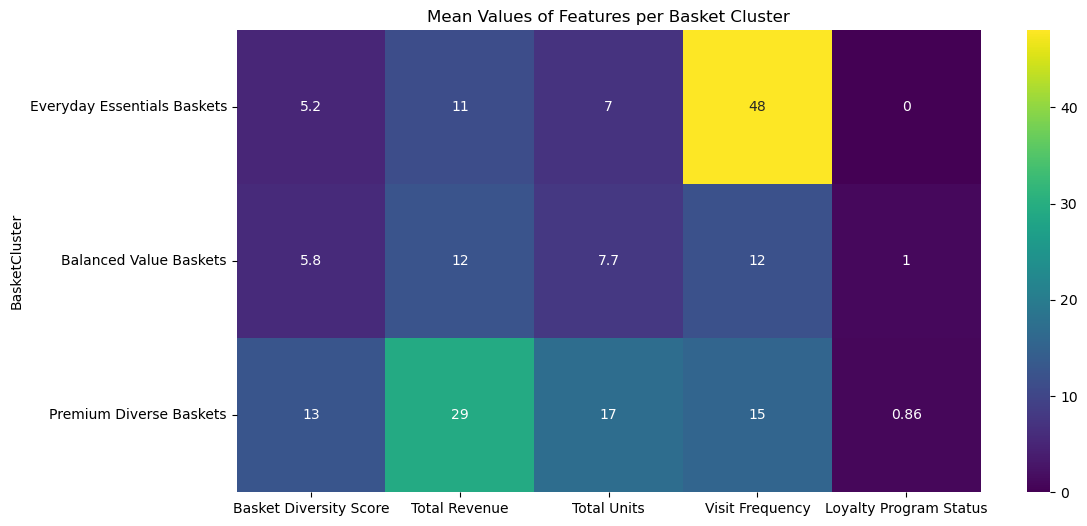

In [99]:
data = {
    'BasketCluster': ['Everyday Essentials Baskets', 'Balanced Value Baskets', 'Premium Diverse Baskets'],
    'Basket Diversity Score': [5.183980, 5.762696, 12.694317], 
    'Total Revenue': [11.100391, 12.418421, 29.109696], 
    'Total Units': [6.995097, 7.697080, 16.905246],
    'Visit Frequency': [48.000000, 11.926398, 15.471866], 
    'Loyalty Program Status': [0.000000, 1.000000, 0.861265]
}

df = pd.DataFrame(data)
df = df.set_index('BasketCluster')

#Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Mean Values of Features per Basket Cluster')
plt.show()

A heatmap for better representation of the relevant features. 

### Demographic Analysis (of cardholders - age group, gender, maritalstatus across the clusters)

In [100]:
#Filter out records where Cardholder ID is -1 (no demographic data)
demographic_data = merged_data_df[merged_data_df['Card_ID'] != -1]

#Remove 'Unknown' values from Age and Marital Status
demographic_data = demographic_data[(demographic_data['Age'] != 'Unknown')]
                                  
demographic_data = demographic_data[(demographic_data['MaritalStatus'] != 'Unknown')]

demographic_data['BasketCluster'] = demographic_data['BasketCluster'].replace({
    0: 'Everyday Essentials Baskets', 
    1: 'Balanced Value Baskets', 
    2: 'Premium Diverse Baskets'
})

#Average Age by Cluster
average_ages = demographic_data.groupby('BasketCluster')['Age'].mean()
print("Average Age by Basket Cluster:")
print(average_ages)

#Gender Distribution by Cluster
gender_distribution = demographic_data.groupby(['BasketCluster', 'Gender']).size()
print("Gender Distribution by Basket Cluster:")
print(gender_distribution)

#Marital Status Distribution by Cluster
marital_status_distribution = demographic_data.groupby(['BasketCluster', 'MaritalStatus']).size()
print("Marital Status Distribution by Basket Cluster:")
print(marital_status_distribution)

Average Age by Basket Cluster:
BasketCluster
Balanced Value Baskets     50.020401
Premium Diverse Baskets    48.829748
Name: Age, dtype: float64
Gender Distribution by Basket Cluster:
BasketCluster            Gender 
Balanced Value Baskets   Female     10759
                         Male        3566
                         Unknown      184
Premium Diverse Baskets  Female      8512
                         Male        2339
                         Unknown      121
dtype: int64
Marital Status Distribution by Basket Cluster:
BasketCluster            MaritalStatus  
Balanced Value Baskets   Divorced             111
                         Married            11871
                         Single (Alone)      2169
                         Single (Family)      309
                         Widow/Widower         49
Premium Diverse Baskets  Divorced              25
                         Married             9027
                         Single (Alone)      1559
                         Singl

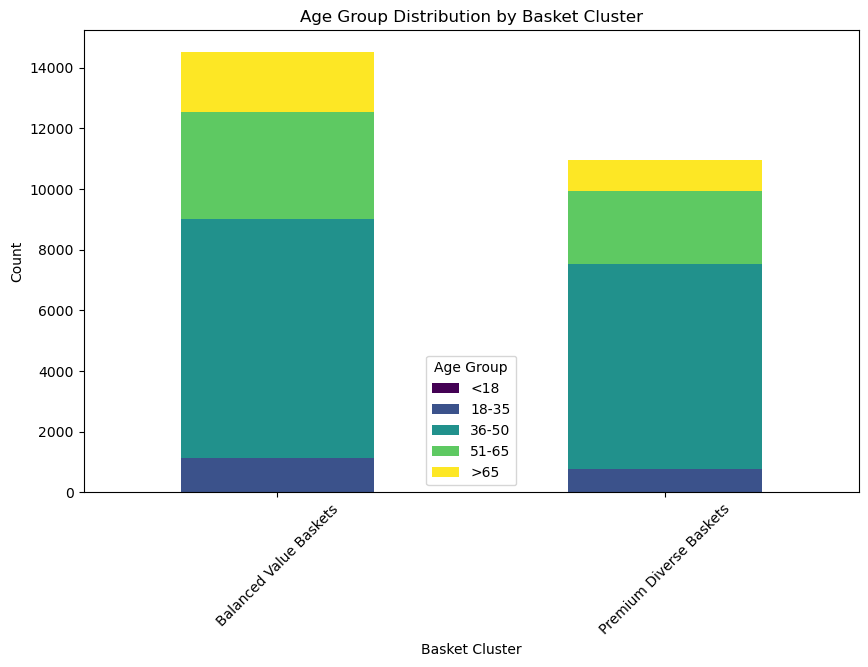

In [101]:
#Age Distribution Visualization:
age_group_distribution = demographic_data.groupby(['BasketCluster', 'AgeGroup']).size().unstack().fillna(0)
age_group_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Age Group Distribution by Basket Cluster')
plt.xlabel('Basket Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

#### Insights from above: 

In both the Basket-Segments, the dominant age group is 36-50 and the other ages are all above 50.

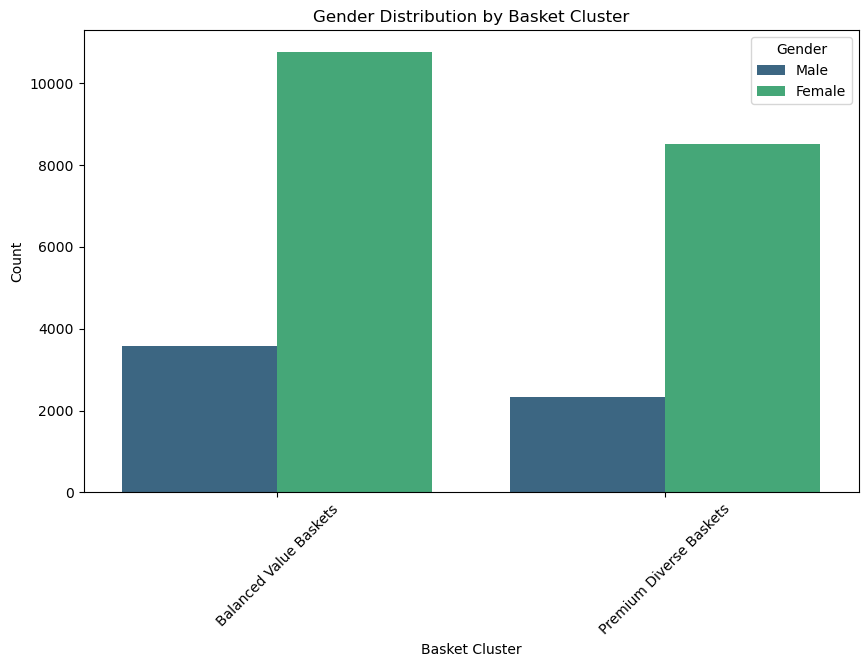

In [102]:
#Filtering out rows where 'Gender' is 'Unknown'
filtered_data = demographic_data[demographic_data['Gender'] != 'Unknown']

#Visualizing Gender Distribution without 'Unknown' Gender using seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='BasketCluster', hue='Gender', data=filtered_data, palette='viridis')
plt.title('Gender Distribution by Basket Cluster')
plt.xlabel('Basket Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

#### Insights from above

In both the basket-segments we can see that it's female dominant, which could suggest that this supermarket attracts many female customers.

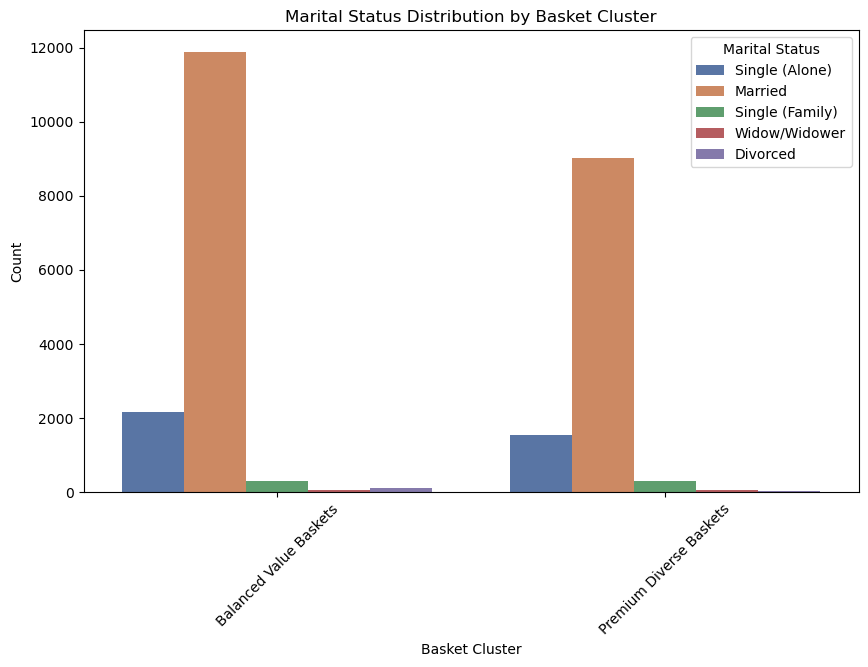

In [103]:
#Marital Status Distribution by Basket Cluster
filtered_data = demographic_data[demographic_data['MaritalStatus'] != 'Unknown']

#Visualizing Marital Status Distribution without 'Unknown' Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='BasketCluster', hue='MaritalStatus', data=filtered_data, palette='deep')
plt.title('Marital Status Distribution by Basket Cluster')
plt.xlabel('Basket Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

#### Insights from above

In both the basket-segments we can see that majority are married.

### Temporal Analysis

Temporal Analysis of Shopping Patterns:
                  BasketCluster    Weekday  Count
0   Everyday Essentials Baskets     Monday  12210
1   Everyday Essentials Baskets  Wednesday  11345
2   Everyday Essentials Baskets   Thursday  11776
3   Everyday Essentials Baskets     Friday  10873
4   Everyday Essentials Baskets   Saturday  12451
5   Everyday Essentials Baskets     Sunday  11097
6        Balanced Value Baskets     Monday  14924
7        Balanced Value Baskets  Wednesday  12323
8        Balanced Value Baskets   Thursday  12461
9        Balanced Value Baskets     Friday  11978
10       Balanced Value Baskets   Saturday  13749
11       Balanced Value Baskets     Sunday  12579
12      Premium Diverse Baskets     Monday  15824
13      Premium Diverse Baskets  Wednesday   9157
14      Premium Diverse Baskets   Thursday   8873
15      Premium Diverse Baskets     Friday   8901
16      Premium Diverse Baskets   Saturday  10210
17      Premium Diverse Baskets     Sunday  11085


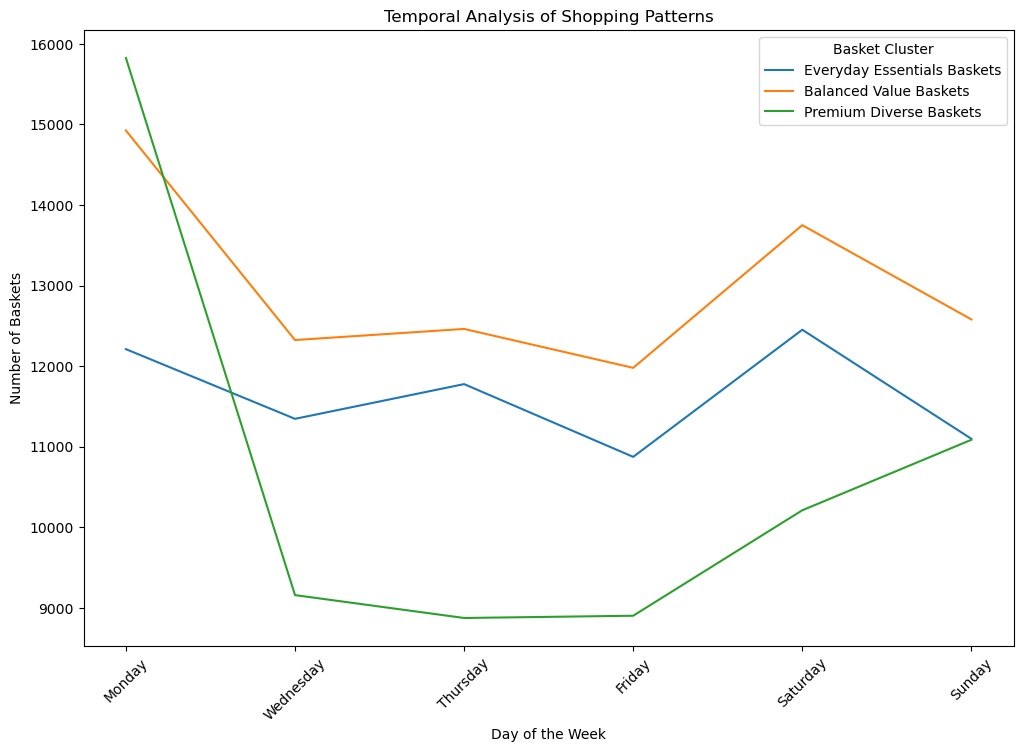

In [104]:
#Aggregating shopping patterns over time within each cluster
temporal_data = merged_data_df.groupby(['BasketCluster', 'Weekday']).size().reset_index(name='Count')

temporal_data['BasketCluster'] = temporal_data['BasketCluster'].replace({
    0: 'Everyday Essentials Baskets', 
    1: 'Balanced Value Baskets', 
    2: 'Premium Diverse Baskets'
})

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temporal_data['Weekday'] = temporal_data['Weekday'].apply(lambda x: days[x])

print("Temporal Analysis of Shopping Patterns:")
print(temporal_data)

#Line Chart for Temporal Analysis
plt.figure(figsize=(12, 8))
sns.lineplot(x='Weekday', y='Count', hue='BasketCluster', data=temporal_data)
plt.title('Temporal Analysis of Shopping Patterns')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Baskets')
plt.xticks(rotation=45)
plt.legend(title='Basket Cluster')
plt.show()

#### Insights from above:

1. Premium Diverse Baskets: Peaks on Mondays (15,824 baskets) and Sundays (11,085), with a mid-week dip, particularly on Thursdays (8,873) and Fridays (8,901). This indicates a preference for shopping at the week's start and end.

2. Balanced Value Baskets: Starts high on Mondays (14,678) and remains consistently high, especially on Thursdays (12,250) and Fridays (13,403). Shows a stable shopping behavior with a slight increase towards the weekend.

3. Everyday Essentials Baskets: Exhibits the least fluctuation. Starts moderately on Mondays (11,679) and maintains a steady count throughout the week, with slight peaks on Fridays (11,953) and a minor dip on Sundays (10,663). Suggests regular, consistent shopping habits.

### Product Category-A Analysis

Here, we are doing the analysis with Category A but the description of it is unclear from the data, we need to check the underlying Category B to understand the Category A better: 

In [105]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 10]['CategoryBDescription'].unique()
category_b_descriptions

array(['DRINKS', 'Detergents', 'Grocery Food'], dtype=object)

In [106]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 20]['CategoryBDescription'].unique()
category_b_descriptions

array(['Deli and canned food', 'DAIRY PRODUCTS', 'butchery',
       'traditional fisherman', 'bakery', 'pastry making',
       'fruits and vegetables', 'traditional butchery'], dtype=object)

In [107]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 30]['CategoryBDescription'].unique()
category_b_descriptions

array(['products thatn expire soon', 'DAIRY PRODUCTS', 'COLD CUTS',
       'salted fish', 'Fresh poultry', 'frozen', 'ice creams'],
      dtype=object)

In [108]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 40]['CategoryBDescription'].unique()
category_b_descriptions

array(['hardware', 'household', 'books-paper-music-video', 'GARDENING',
       'house organized', 'car', 'GAME - ENTERTAINMENT '], dtype=object)

In [109]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 50]['CategoryBDescription'].unique()
category_b_descriptions

array(['electronic devices', 'gifts', 'TV - HIFI - sound'], dtype=object)

In [110]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 60]['CategoryBDescription'].unique()
category_b_descriptions

array(['bed and kitchen ', 'babies clothing', 'man clothing', 'shoes',
       'underwear'], dtype=object)

In [111]:
category_b_descriptions = product_taxonomy_df[product_taxonomy_df['CategoryA'] == 90]['CategoryBDescription'].unique()
category_b_descriptions

array(['telephone '], dtype=object)

#### Insights from above: 

Category A-10 -> **Household Essentials** -> Has Drinks, Detergent and Grocery Food

Category A-20 -> **Grocery Essentials** -> Has 'Deli and canned food', 'DAIRY PRODUCTS', 'butchery',
       'traditional fisherman', 'bakery', 'pastry making',
       'fruits and vegetables', 'traditional butchery

Category A-30 -> **Perishable Foods** -> Has 'products thatn expire soon', 'DAIRY PRODUCTS', 'COLD CUTS',
       'salted fish', 'Fresh poultry', 'frozen', 'ice creams'

Category A-40 -> **Home & Lifestyle** -> Has 'hardware', 'household', 'books-paper-music-video', 'GARDENING',
       'house organized', 'car', 'GAME - ENTERTAINMENT '

Category A-50 -> **Electronics & Gifts** -> Has 'electronic devices', 'gifts', 'TV - HIFI - sound'

Category A-60 -> **Home & Apparel** -> Has 'bed and kitchen ', 'babies clothing', 'man clothing', 'shoes',
       'underwear

Category A-90 -> **Telephone**

In [112]:
#Analysis of Product Category A in each cluster
category_data = merged_data_df.groupby(['BasketCluster', 'CategoryA'])['Barcode'].count().reset_index(name='Count')

category_data['BasketCluster'] = category_data['BasketCluster'].replace({
    0: 'Everyday Essentials Baskets', 
    1: 'Balanced Value Baskets', 
    2: 'Premium Diverse Baskets'
})

#Printing the aggregated data
print("Product Category-A Analysis by Basket Cluster:")
print(category_data)

Product Category-A Analysis by Basket Cluster:
                  BasketCluster  CategoryA  Count
0   Everyday Essentials Baskets       10.0  38688
1   Everyday Essentials Baskets       20.0  15252
2   Everyday Essentials Baskets       30.0  12946
3   Everyday Essentials Baskets       40.0   2158
4   Everyday Essentials Baskets       50.0     30
5   Everyday Essentials Baskets       60.0    184
6        Balanced Value Baskets       10.0  41049
7        Balanced Value Baskets       20.0  18991
8        Balanced Value Baskets       30.0  14566
9        Balanced Value Baskets       40.0   2524
10       Balanced Value Baskets       50.0     28
11       Balanced Value Baskets       60.0    145
12      Premium Diverse Baskets       10.0  36135
13      Premium Diverse Baskets       20.0  14365
14      Premium Diverse Baskets       30.0  10872
15      Premium Diverse Baskets       40.0   1934
16      Premium Diverse Baskets       50.0     14
17      Premium Diverse Baskets       60.0    100


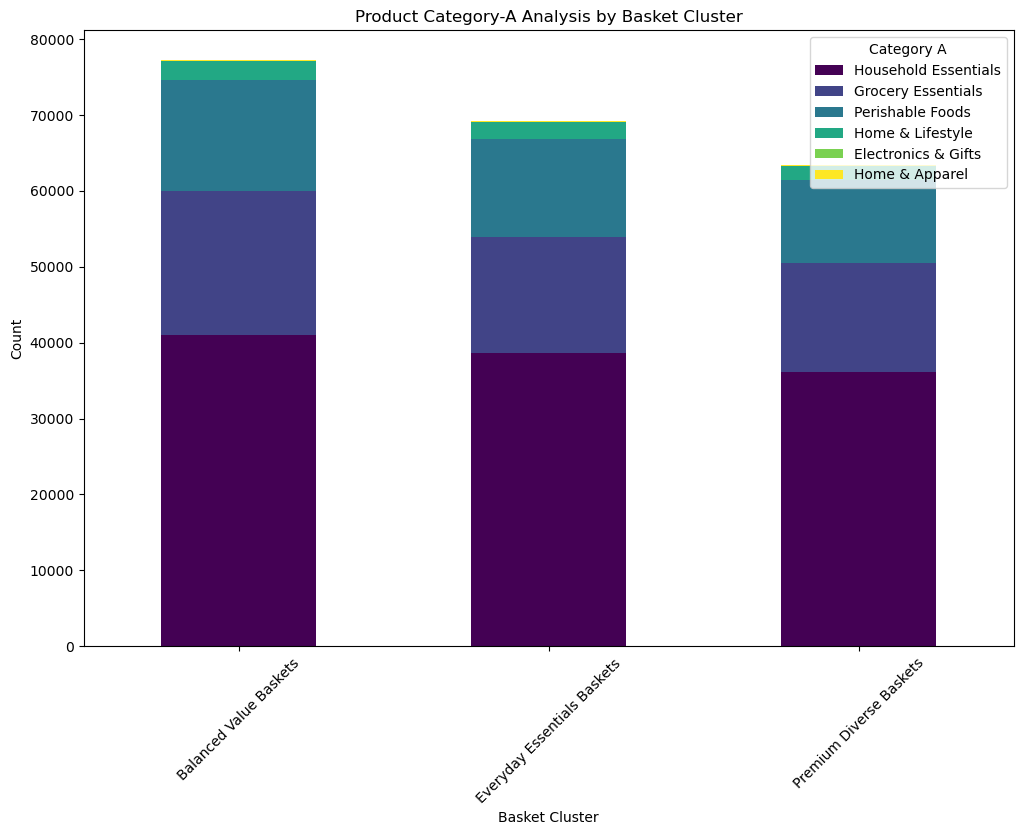

In [113]:
pivot_data = category_data.pivot(index='BasketCluster', columns='CategoryA', values='Count')

#Defining custom labels for each category
category_labels = {
    10: 'Household Essentials',
    20: "Grocery Essentials",
    30: "Perishable Foods",
    40: "Home & Lifestyle",
    50: "Electronics & Gifts",
    60: "Home & Apparel",
    90: "Telephone"
}

#Updating labels in the DataFrame
pivot_data.columns = [category_labels.get(int(col), col) for col in pivot_data.columns]

#Plotting
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Product Category-A Analysis by Basket Cluster')
plt.xlabel('Basket Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category A', loc='upper right')
plt.show()

#### Insights from above

1. Premium Diverse Baskets:

Dominated by Category A-10 (Household Essentials) with 36,135 items. Significant presence of Category A-20 (Grocery Essentials) with 14,365 items and A-30 (Perishable Foods) with 10,872 items. Limited items in Categories A-40 (Home & Lifestyle) with 1,934 items, A-50 (Electronics & Gifts) with 14 items, and A-60 (Home & Apparel) with 100 items.

2. Balanced Value Baskets:

Highest count in Category A-10 (Household Essentials) with 41,049 items. More balanced distribution with Category A-20 (Grocery Essentials) at 18,991 items and A-30 (Perishable Foods) at 14,566 items also prominent. Higher counts than Premium Diverse Baskets in Categories A-40 (Home & Lifestyle) with 2,524 items, A-50 (Electronics & Gifts) with 28 items, and A-60 (Home & Apparel) with 145 items, though these categories still form a minor part.

3. Everyday Essentials Baskets:

Similar trend to Balanced Value Baskets, with the highest count in Category A-10 (Household Essentials) at 38,688 items. Slightly fewer items in Category A-20 (Grocery Essentials) with 15,252 items and A-30 (Perishable Foods) with 12,946 items compared to Balanced Value Baskets. Comparable counts in Categories A-40 (Home & Lifestyle) with 2,158 items, A-50 (Electronics & Gifts) with 30 items, and A-60 (Home & Apparel) with 184 items to Balanced Value Baskets.

### Product Category-B Analysis: 

**Category B unqiue Values:** 11: DRINKS
12: Detergents
14: Grocery Food
21: Products that expire soon
22: DAIRY PRODUCTS
23: COLD CUTS
24: Salted fish
25: Fresh poultry
26: Frozen
27: Ice creams
30: Hardware
31: Household
32: Books, paper, music, video
35: GARDENING
36: House organized
37: Car
38: Game - Entertainment
40: Bed and kitchen
41: Babies clothing
44: Man clothing
50: Deli and canned food
51: DAIRY PRODUCTS
52: Butchery
53: Traditional fisherman
54: Bakery
55: Pastry making
56: Fruits and vegetables
57: Traditional butchery
60: Shoes
62: Underwear
81: Electronic devices
85: Gifts
87: TV - HIFI - sound
91: Telephone

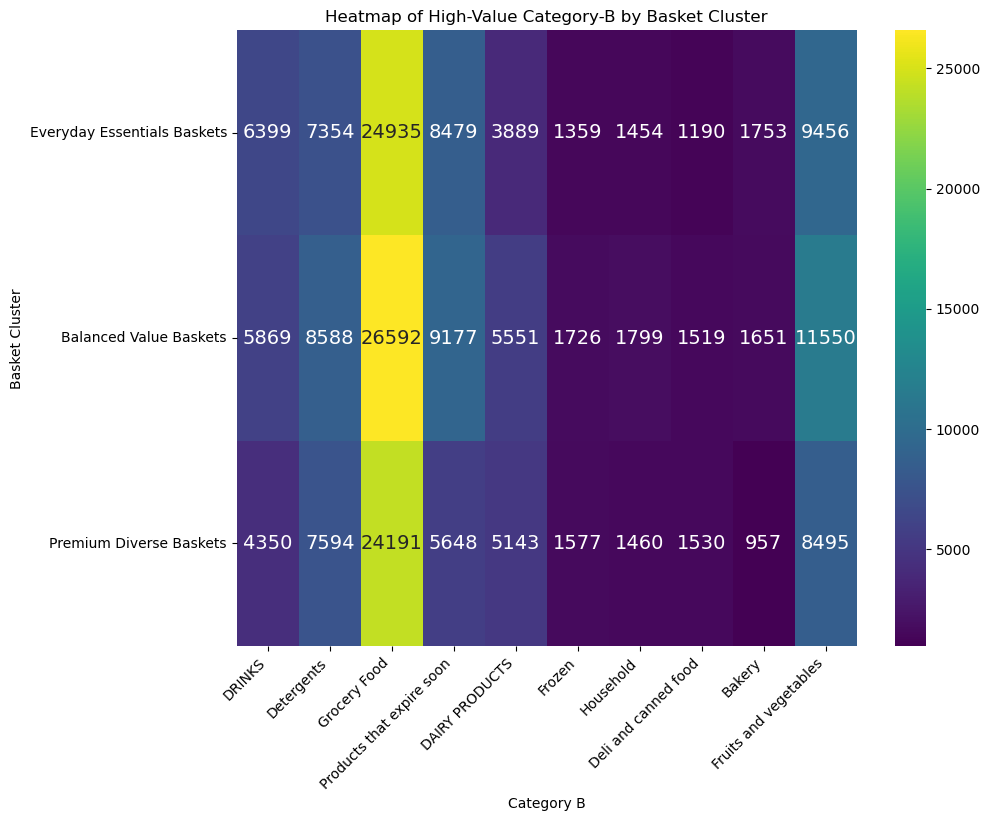

In [114]:
#Grouping and counting the barcodes for each BasketCluster and CategoryB
category_data = merged_data_df.groupby(['BasketCluster', 'CategoryB'])['Barcode'].count().reset_index(name='Count')

#Combining counts for Category B 22 and 51
combined_dairy = category_data[category_data['CategoryB'].isin([22, 51])]
combined_dairy = combined_dairy.groupby(['BasketCluster']).agg({'Count': 'sum'}).reset_index()
combined_dairy['CategoryB'] = 22  #Assigning a single CategoryB label for the combined counts

#Removing the old counts for Category B 22 and 51
category_data = category_data[~category_data['CategoryB'].isin([22, 51])]

#Appending the combined dairy data
category_data = pd.concat([category_data, combined_dairy], ignore_index=True)

#Pivoting the data
pivot_data_b = category_data.pivot(index='BasketCluster', columns='CategoryB', values='Count')

category_b_labels = {
    11: 'DRINKS',
    12: 'Detergents',
    14: 'Grocery Food',
    21: 'Products that expire soon',
    22: 'DAIRY PRODUCTS',  #Combined category
    23: 'COLD CUTS',
    24: 'Salted fish',
    25: 'Fresh poultry',
    26: 'Frozen',
    27: 'Ice creams',
    30: 'Hardware',
    31: 'Household',
    32: 'Books, paper, music, video',
    35: 'GARDENING',
    36: 'House organized',
    37: 'Car',
    38: 'Game - Entertainment',
    40: 'Bed and kitchen',
    41: 'Babies clothing',
    44: 'Man clothing',
    50: 'Deli and canned food',
    52: 'Butchery',
    53: 'Traditional fisherman',
    54: 'Bakery',
    55: 'Pastry making',
    56: 'Fruits and vegetables',
    57: 'Traditional butchery',
    58: 'No Description Mentioned',
    60: 'Shoes',
    62: 'Underwear',
    81: 'Electronic devices',
    85: 'Gifts',
    87: 'TV - HIFI - sound',
    91: 'Telephone'
}

pivot_data_b.columns = [category_b_labels.get(col, col) for col in pivot_data_b.columns]

#Defining a threshold for filtering
threshold = 1000  

#Customing labels for BasketCluster
basket_cluster_labels = {
    0: 'Everyday Essentials Baskets', 
    1: 'Balanced Value Baskets', 
    2: 'Premium Diverse Baskets'
}

#Mapping the custom labels to BasketCluster
pivot_data_b.index = pivot_data_b.index.map(basket_cluster_labels)

#Filtering the columns (CategoryB) based on the threshold
cols_to_keep = pivot_data_b.columns[pivot_data_b.max() > threshold]

#Filtering the rows (BasketCluster) based on the threshold
rows_to_keep = pivot_data_b.index[pivot_data_b.max(axis=1) > threshold]

#Creating a new pivot table with filtered rows and columns
filtered_pivot_data_b = pivot_data_b.loc[rows_to_keep, cols_to_keep]

#Plotting the heatmap with the filtered data
plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = sns.heatmap(filtered_pivot_data_b, annot=True, cmap='viridis', fmt='g', annot_kws={"size": 14})
plt.title('Heatmap of High-Value Category-B by Basket Cluster')
plt.xlabel('Category B')
plt.ylabel('Basket Cluster')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Heatmap for better representation of Category B items (above 1000 products) for the clusters.

# V. CUSTOMER SEGMENTATION

### Customer Segmentation for Cardholders (as demographic data is only present for them):

In [115]:
#Removing the non-cardholders from our merged_data
merged2_data_df = merged_data_df[merged_data_df['Card_ID'] != -1]

In [116]:
merged2_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net,Avg_Unit_Price,Distinct_Item_Count,CategoryA,CategoryB,CategoryC,CategoryD,Visit_Frequency,Combined_Category,Basket_Diversity_Score,Weekday,Is_Weekend,Age,Gender,MaritalStatus,HouseholdSize,Children,AgeGroup,Is_Loyalty_Member,BasketCluster
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260,19,27.399442,0.980000,11,10.0,14.0,239.0,2.0,1,"(10.0, 14.0, 239.0, 2.0)",5,2,0,54.0,Female,Unknown,2.0,0.0,51-65,1,2
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385,11,6.100161,0.290002,6,10.0,14.0,239.0,2.0,23,"(10.0, 14.0, 239.0, 2.0)",6,4,0,48.0,Female,Unknown,1.0,0.0,36-50,1,1
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409,8,10.581335,0.749817,8,20.0,56.0,183.0,9.0,1,"(20.0, 56.0, 183.0, 9.0)",6,4,0,72.0,Female,Unknown,1.0,0.0,>65,1,1
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351,9,11.910022,0.300000,8,40.0,31.0,316.0,1.0,10,"(40.0, 31.0, 316.0, 1.0)",7,4,0,51.0,Female,Unknown,1.0,0.0,51-65,1,1
5,1089674734,2013-03-06,212878100000,1,3.808804,9162006543842,16,24.551577,3.808804,10,20.0,51.0,110.0,1.0,21,"(20.0, 51.0, 110.0, 1.0)",9,2,0,35.0,Female,Unknown,1.0,0.0,36-50,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235509,1093976858,2013-03-18,401560065704,1,1.900015,9160002746281,23,48.049156,1.900015,21,10.0,12.0,282.0,3.0,1,"(10.0, 12.0, 282.0, 3.0)",19,0,0,24.0,Female,Unknown,6.0,0.0,18-35,1,2
235511,1100351593,2013-04-08,807617600000,2,1.440000,9161003517238,11,16.110022,0.720000,9,10.0,14.0,213.0,4.0,7,"(10.0, 14.0, 213.0, 4.0)",9,0,0,33.0,Female,Unknown,3.0,1.0,18-35,1,1
235513,1100780083,2013-04-10,500011258531,1,2.629993,9164014016790,3,8.729802,2.629993,3,10.0,11.0,261.0,1.0,3,"(10.0, 11.0, 261.0, 1.0)",3,2,0,48.0,Unknown,Unknown,1.0,0.0,36-50,1,1
235514,1093498033,2013-03-17,210996300000,1,4.040059,9164013170608,2,6.240440,4.040059,2,20.0,56.0,181.0,11.0,6,"(20.0, 56.0, 181.0, 11.0)",2,6,1,48.0,Unknown,Unknown,1.0,0.0,36-50,1,1


### One-hot encoding for categorical columns for customer segmentation

In [117]:
print(merged2_data_df['MaritalStatus'].value_counts())

MaritalStatus
Unknown            107697
Married             20898
Single (Alone)       3728
Single (Family)       602
Divorced              136
Widow/Widower         117
Name: count, dtype: int64


In [118]:
print(merged2_data_df['Gender'].value_counts())

Gender
Female     77008
Male       34577
Unknown    21593
Name: count, dtype: int64


In [119]:
print(merged2_data_df['AgeGroup'].value_counts())

AgeGroup
36-50    98645
51-65    14534
>65      10730
18-35     9237
<18         32
Name: count, dtype: int64


Deleting MaritalStatus Columns as realised it won't make much impact with the cluster as there are many unknowns.

In [120]:
data = merged2_data_df.copy()

#Saving the original columns
original_gender = data['Gender'].copy()
original_age_group = data['AgeGroup'].copy()

#Performing one-hot encoding
data = pd.get_dummies(data, columns=['Gender', 'AgeGroup'], drop_first=False)

#Concatenating the original columns back into the dataframe
data['Original_Gender'] = original_gender
data['Original_AgeGroup'] = original_age_group

#List of new columns for conversion to integer
columns_to_convert = ['Gender_Female', 'Gender_Male', 'Gender_Unknown',
                      'AgeGroup_<18', 'AgeGroup_18-35', 'AgeGroup_36-50',
                      'AgeGroup_51-65', 'AgeGroup_>65']

#Converting columns to 1 or 0
data[columns_to_convert] = data[columns_to_convert].astype(int)

merged2_data_df = data

In [121]:
#if 'n' categories then 'n-1' columns after one hot encoding, hence deleting one of the columns
del merged2_data_df['Gender_Unknown']
del merged2_data_df['AgeGroup_<18']

In [123]:
merged2_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net,Avg_Unit_Price,Distinct_Item_Count,CategoryA,CategoryB,CategoryC,CategoryD,Visit_Frequency,Combined_Category,Basket_Diversity_Score,Weekday,Is_Weekend,Age,MaritalStatus,HouseholdSize,Children,Is_Loyalty_Member,BasketCluster,Gender_Female,Gender_Male,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_>65,Original_Gender,Original_AgeGroup
0,1103084867,2013-04-17,800220505783,2,1.960000,9160003751260,19,27.399442,0.980000,11,10.0,14.0,239.0,2.0,1,"(10.0, 14.0, 239.0, 2.0)",5,2,0,54.0,Unknown,2.0,0.0,1,2,1,0,0,0,1,0,Female,51-65
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385,11,6.100161,0.290002,6,10.0,14.0,239.0,2.0,23,"(10.0, 14.0, 239.0, 2.0)",6,4,0,48.0,Unknown,1.0,0.0,1,1,1,0,0,1,0,0,Female,36-50
3,1106160983,2013-04-26,211069400000,1,0.749817,9162005811409,8,10.581335,0.749817,8,20.0,56.0,183.0,9.0,1,"(20.0, 56.0, 183.0, 9.0)",6,4,0,72.0,Unknown,1.0,0.0,1,1,1,0,0,0,0,1,Female,>65
4,1108695491,2013-05-03,520286400380,2,0.600000,9161003517351,9,11.910022,0.300000,8,40.0,31.0,316.0,1.0,10,"(40.0, 31.0, 316.0, 1.0)",7,4,0,51.0,Unknown,1.0,0.0,1,1,1,0,0,0,1,0,Female,51-65
5,1089674734,2013-03-06,212878100000,1,3.808804,9162006543842,16,24.551577,3.808804,10,20.0,51.0,110.0,1.0,21,"(20.0, 51.0, 110.0, 1.0)",9,2,0,35.0,Unknown,1.0,0.0,1,2,1,0,0,1,0,0,Female,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235509,1093976858,2013-03-18,401560065704,1,1.900015,9160002746281,23,48.049156,1.900015,21,10.0,12.0,282.0,3.0,1,"(10.0, 12.0, 282.0, 3.0)",19,0,0,24.0,Unknown,6.0,0.0,1,2,1,0,1,0,0,0,Female,18-35
235511,1100351593,2013-04-08,807617600000,2,1.440000,9161003517238,11,16.110022,0.720000,9,10.0,14.0,213.0,4.0,7,"(10.0, 14.0, 213.0, 4.0)",9,0,0,33.0,Unknown,3.0,1.0,1,1,1,0,1,0,0,0,Female,18-35
235513,1100780083,2013-04-10,500011258531,1,2.629993,9164014016790,3,8.729802,2.629993,3,10.0,11.0,261.0,1.0,3,"(10.0, 11.0, 261.0, 1.0)",3,2,0,48.0,Unknown,1.0,0.0,1,1,0,0,0,1,0,0,Unknown,36-50
235514,1093498033,2013-03-17,210996300000,1,4.040059,9164013170608,2,6.240440,4.040059,2,20.0,56.0,181.0,11.0,6,"(20.0, 56.0, 181.0, 11.0)",2,6,1,48.0,Unknown,1.0,0.0,1,1,0,0,0,1,0,0,Unknown,36-50


Features from merged2_data_df for customer segmentation:
1. **Numerical features:** 'Sum_Units_net', 'Sum_Value_net', 'Avg_Unit_Price', 'Distinct_Item_Count', 'Visit_Frequency', 'Basket_Diversity_Score'
2. **Categorical features:** 'Gender_Female', 'Gender_Male','AgeGroup_18-35', 'AgeGroup_36-50', 'AgeGroup_51-65', 'AgeGroup_>65'

### Calculating the Pearson correlation matrix to find the correlation between features:

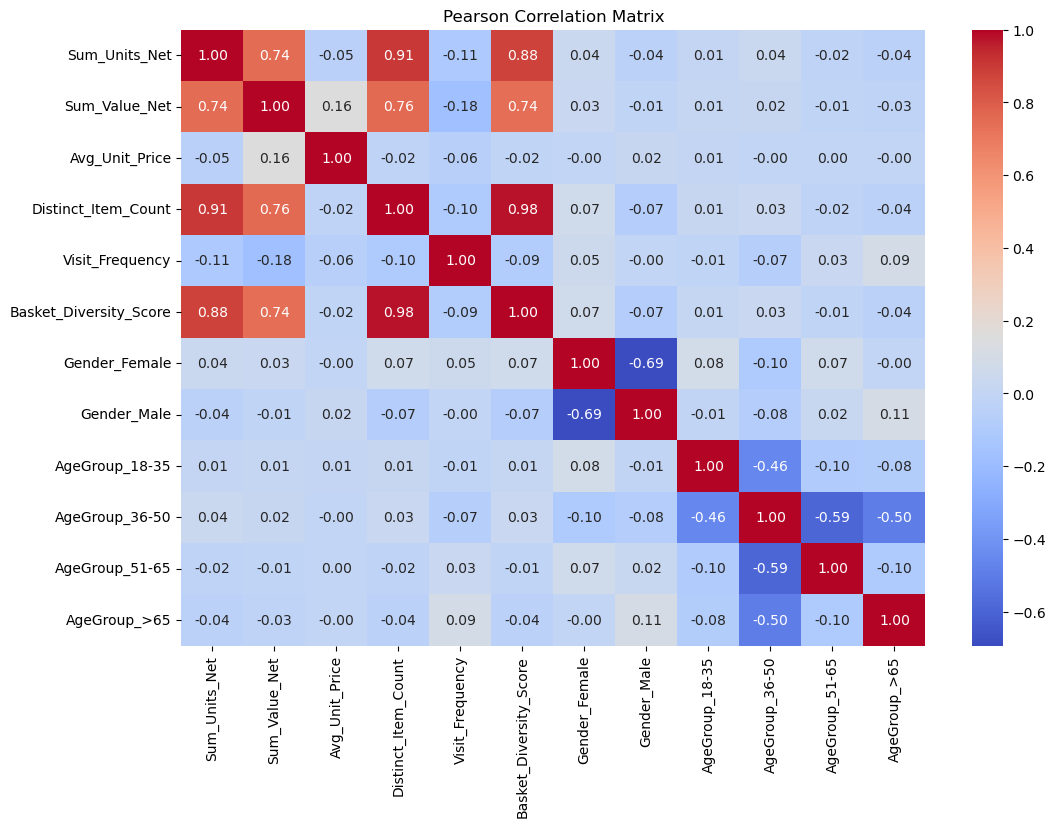

,Sum_Units_Net,Sum_Value_Net,Avg_Unit_Price,Distinct_Item_Count,Visit_Frequency,Basket_Diversity_Score,Gender_Female,Gender_Male,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_>65
Sum_Units_Net,1.000000,0.744910,-0.049479,0.906695,-0.113684,0.879092,0.037599,-0.044630,0.005068,0.038475,-0.022226,-0.041217
Sum_Value_Net,0.744910,1.000000,0.158923,0.759788,-0.176393,0.741746,0.029161,-0.014217,0.011397,0.019617,-0.014902,-0.025231
Avg_Unit_Price,-0.049479,0.158923,1.000000,-0.020273,-0.058747,-0.017285,-0.000516,0.018023,0.006948,-0.002495,0.000153,-0.002769
Distinct_Item_Count,0.906695,0.759788,-0.020273,1.000000,-0.100606,0.977376,0.069903,-0.072285,0.014825,0.031412,-0.018844,-0.042718
Visit_Frequency,-0.113684,-0.176393,-0.058747,-0.100606,1.000000,-0.089167,0.047503,-0.003115,-0.014583,-0.068984,0.032615,0.088237
Basket_Diversity_Score,0.879092,0.741746,-0.017285,0.977376,-0.089167,1.000000,0.068401,-0.074370,0.011408,0.028910,-0.014216,-0.040704
Gender_Female,0.037599,0.029161,-0.000516,0.069903,0.047503,0.068401,1.000000,-0.693376,0.083537,-0.099325,0.073533,-0.001924
Gender_Male,-0.044630,-0.014217,0.018023,-0.072285,-0.003115,-0.074370,-0.693376,1.000000,-0.008844,-0.076485,0.021341,0.106228
AgeGroup_18-35,0.005068,0.011397,0.006948,0.014825,-0.014583,0.011408,0.083537,-0.008844,1.000000,-0.461401,-0.095549,-0.080813
AgeGroup_36-50,0.038475,0.019617,-0.002495,0.031412,-0.068984,0.028910,-0.099325,-0.076485,-0.461401,1.000000,-0.591548,-0.500316


In [124]:
selected_columns = [
    'Sum_Units_Net', 'Sum_Value_Net', 'Avg_Unit_Price', 'Distinct_Item_Count', 'Visit_Frequency', 'Basket_Diversity_Score',
    'Gender_Female', 'Gender_Male', 'AgeGroup_18-35', 'AgeGroup_36-50', 'AgeGroup_51-65', 'AgeGroup_>65'
]

#Creating a new DataFrame with selected columns
correlation_data = merged2_data_df[selected_columns]

#Calculating the Pearson correlation matrix
correlation_matrix = correlation_data.corr()

#Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

correlation_matrix

Removing only the highly similarly correlated variables (like how it was done for basket segmentation) amnd keeping some correlated variables with business impact, we get the below features: 

In [125]:
Features = ['Basket_Diversity_Score',
            'Sum_Value_Net',
            'Sum_Units_Net',
            'Visit_Frequency',
            'Is_Weekend',
            'Avg_Unit_Price',
            'Gender_Male',
            'Gender_Female',
            'AgeGroup_18-35',
            'AgeGroup_36-50',
            'AgeGroup_51-65', 
            'AgeGroup_>65']

In [126]:
#Checking for missing values in the specified columns
missing_values = merged2_data_df[Features].isnull().sum()
print(missing_values)

Basket_Diversity_Score    0
Sum_Value_Net             0
Sum_Units_Net             0
Visit_Frequency           0
Is_Weekend                0
Avg_Unit_Price            0
Gender_Male               0
Gender_Female             0
AgeGroup_18-35            0
AgeGroup_36-50            0
AgeGroup_51-65            0
AgeGroup_>65              0
dtype: int64


#### Removing outliers in the Features

In [127]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering out the outliers
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return filtered_df

In [128]:
original_shape = merged2_data_df.shape

for feature in Features:
    merged2_data_df = remove_outliers(merged2_data_df, feature)

#Now merged2_data_df has had outliers removed feature by feature
new_shape = merged2_data_df.shape

print(f"Original dataframe shape: {original_shape}")
print(f"Dataframe shape after outlier removal: {new_shape}")

Original dataframe shape: (133178, 33)
Dataframe shape after outlier removal: (92995, 33)


### K-Means clustering for Customer Segmentation: 

In [129]:
Features = ['Basket_Diversity_Score',
            'Sum_Value_Net',
            'Sum_Units_Net',
            'Visit_Frequency',
            'Is_Weekend',
            'Avg_Unit_Price',
            'Gender_Male',
            'Gender_Female',
            'AgeGroup_18-35',
            'AgeGroup_36-50',
            'AgeGroup_51-65', 
            'AgeGroup_>65']

In [130]:
# Extracting the selected features
Extract = merged2_data_df[Features]

# Normalize the features
scaler = StandardScaler()
Extract_scaled = scaler.fit_transform(Extract)

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.

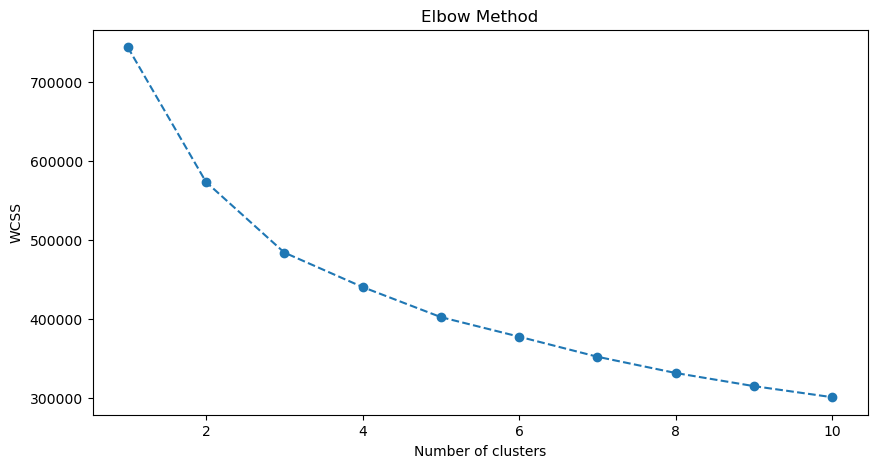

In [131]:
#Using Elbow Method to determine the number of clusters for kmeans clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Extract_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above k=3, as that's the point where the rate of decrease in WCSS starts to level off.

In [132]:
#Clustering the data
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
merged2_data_df['CustomerCluster'] = kmeans.fit_predict(Extract_scaled)

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [133]:
merged2_data_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Sum_Units_Net,Sum_Value_Net,Avg_Unit_Price,Distinct_Item_Count,CategoryA,CategoryB,CategoryC,CategoryD,Visit_Frequency,Combined_Category,Basket_Diversity_Score,Weekday,Is_Weekend,Age,MaritalStatus,HouseholdSize,Children,Is_Loyalty_Member,BasketCluster,Gender_Female,Gender_Male,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_>65,Original_Gender,Original_AgeGroup,CustomerCluster
2,1092750793,2013-03-15,520423907421,6,1.740015,9164012915385,11,6.100161,0.290002,6,10.0,14.0,239.0,2.0,23,"(10.0, 14.0, 239.0, 2.0)",6,4,0,48.0,Unknown,1.0,0.0,1,1,1,0,0,1,0,0,Female,36-50,1
5,1089674734,2013-03-06,212878100000,1,3.808804,9162006543842,16,24.551577,3.808804,10,20.0,51.0,110.0,1.0,21,"(20.0, 51.0, 110.0, 1.0)",9,2,0,35.0,Unknown,1.0,0.0,1,2,1,0,0,1,0,0,Female,36-50,2
6,1100327962,2013-04-08,871626600000,1,0.740015,9164013172107,9,10.620073,0.740015,9,10.0,14.0,216.0,2.0,4,"(10.0, 14.0, 216.0, 2.0)",8,0,0,48.0,Unknown,1.0,0.0,1,1,0,0,0,1,0,0,Unknown,36-50,1
7,1105798474,2013-04-25,211087700000,1,1.560235,9162002290450,18,22.650800,1.560235,14,20.0,56.0,183.0,5.0,18,"(20.0, 56.0, 183.0, 5.0)",13,3,0,41.0,Unknown,2.0,1.0,1,2,1,0,0,1,0,0,Female,36-50,2
11,1098440439,2013-04-03,520306400115,1,1.250007,9162008740232,10,15.660044,1.250007,8,10.0,14.0,203.0,7.0,3,"(10.0, 14.0, 203.0, 7.0)",6,2,0,48.0,Unknown,1.0,0.0,1,1,1,0,0,1,0,0,Female,36-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235496,1094420481,2013-03-21,295200400000,1,2.610301,9163002235410,2,3.000176,2.610301,2,20.0,56.0,181.0,2.0,3,"(20.0, 56.0, 181.0, 2.0)",2,3,0,41.0,Unknown,1.0,0.0,1,1,0,1,0,1,0,0,Male,36-50,0
235501,1106160937,2013-04-26,520423930822,1,2.300015,9162002291860,18,28.750432,2.300015,10,10.0,14.0,230.0,5.0,4,"(10.0, 14.0, 230.0, 5.0)",10,4,0,48.0,Married,4.0,2.0,1,2,1,0,0,1,0,0,Female,36-50,2
235502,1108707433,2013-05-03,520139560011,1,2.389993,9164014015885,14,25.340044,2.389993,13,10.0,12.0,287.0,1.0,6,"(10.0, 12.0, 287.0, 1.0)",12,4,0,48.0,Unknown,1.0,0.0,1,2,0,0,0,1,0,0,Unknown,36-50,2
235513,1100780083,2013-04-10,500011258531,1,2.629993,9164014016790,3,8.729802,2.629993,3,10.0,11.0,261.0,1.0,3,"(10.0, 11.0, 261.0, 1.0)",3,2,0,48.0,Unknown,1.0,0.0,1,1,0,0,0,1,0,0,Unknown,36-50,1


In [134]:
temp_df = merged2_data_df

### Cluster Characteristics

In [135]:
temp_df.groupby('CustomerCluster')[Features].mean()

,Basket_Diversity_Score,Sum_Value_Net,Sum_Units_Net,Visit_Frequency,Is_Weekend,Avg_Unit_Price,Gender_Male,Gender_Female,AgeGroup_18-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_>65
CustomerCluster,,,,,,,,,,,,
0,7.563314,17.189019,10.479648,10.617713,0.336922,1.476485,1.000000,0.000000,0.0,1.0,0.0,0.0
1,5.849413,12.297136,7.788498,10.814358,0.331149,1.435978,0.000000,0.710613,0.0,1.0,0.0,0.0
2,12.756399,28.524232,16.917428,9.103504,0.334583,1.506876,0.057343,0.686502,0.0,1.0,0.0,0.0


1. Segment 0: **High-Spending Male Shoppers**

Basket Diversity: Moderately diverse (7.56), indicating a mix of routine and varied purchases.
Spending & Units: Higher spending (17.19) and unit count (10.48), suggesting a tendency towards more expensive or numerous purchases.
Visit Frequency: Regular (10.62), showing consistent shopping habits.
Weekend Shopping: Mild preference for weekdays (Is_Weekend = 0.34), perhaps due to work-week routines.
Demographics: Exclusively male (Gender_Male = 1.0), with a specific focus on the age group 36-50 (AgeGroup_36-50 = 1.0).

2. Segment 1: **Regular Female Shoppers**

Basket Diversity: Moderately diverse (5.85), reflecting a range of regular purchases.
Spending & Units: Moderate spending (12.30) and unit count (7.79), indicating average shopping baskets.
Visit Frequency: Regular (10.81), suggesting stable shopping patterns.
Weekend Shopping: Slight preference for weekdays (Is_Weekend = 0.33).
Demographics: Predominantly female (Gender_Female = 0.71), specifically in the 36-50 age group (AgeGroup_36-50 = 1.0).

3. Segment 2: **Diverse Frequent Shoppers**

Basket Diversity: Highly diverse (12.76), showcasing a wide array of choices in shopping.
Spending & Units: Highest spending (28.52) and unit count (16.92), indicating frequent and substantial purchases.
Visit Frequency: Very frequent (9.10), potentially suggesting loyalty and regular visits.
Weekend Shopping: Moderate weekend preference (Is_Weekend = 0.33), balancing shopping across the week.
Demographics: Mostly female (Gender_Female = 0.69) with a minor male representation (Gender_Male = 0.06), focused on the 36-50 age group (AgeGroup_36-50 = 1.0).

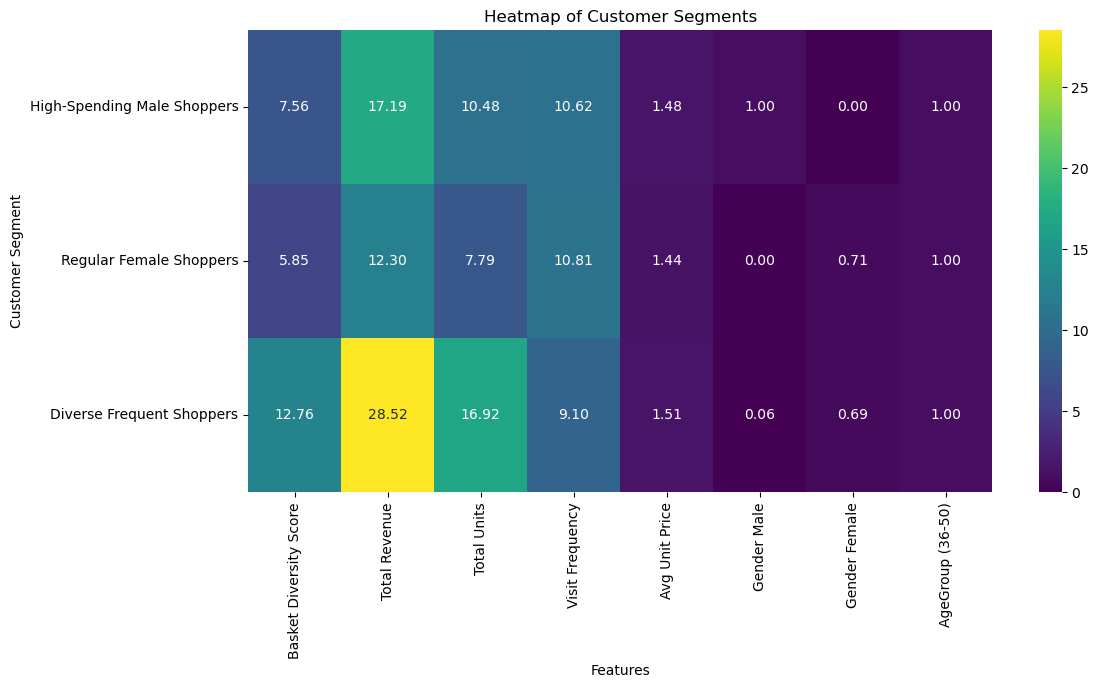

In [137]:
data = {
    'Basket Diversity Score': [7.563314, 5.849413, 12.756399],
    'Total Revenue': [17.189019, 12.297136, 28.524232],
    'Total Units': [10.479648, 7.788498, 16.917428],
    'Visit Frequency': [10.617713, 10.814358, 9.103504],
    'Avg Unit Price': [1.476485, 1.435978, 1.506876],
    'Gender Male': [1.000000, 0.000000, 0.057343],
    'Gender Female': [0.000000, 0.710613, 0.686502],
 #   'AgeGroup (18-35)': [0.0, 0.0, 0.0],
    'AgeGroup (36-50)': [1.0, 1.0, 1.0],
 #   'AgeGroup (51-65)': [0.0, 0.0, 0.0],
 #   'AgeGroup (>65)': [0.0, 0.0, 0.0]
}

# Creating the DataFrame with updated segment names
temp_df = pd.DataFrame(data, index=['High-Spending Male Shoppers', 'Regular Female Shoppers', 'Diverse Frequent Shoppers'])

# Creating the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(temp_df, annot=True, cmap='viridis', fmt='.2f')

# Adding titles and labels
plt.title('Heatmap of Customer Segments')
plt.xlabel('Features')
plt.ylabel('Customer Segment')

# Show the heatmap
plt.show()

In [ ]:
merged2_data_df

A heatmap for better representation of the relevant features. 

In [138]:
customer_df = merged2_data_df

### Demographic Analysis (of cardholders - age group, gender, maritalstatus across the clusters)

In [ ]:
#excel_file_path = 'C:\\Users\\Administrator\\Desktop\\Customer_Cluster.xlsx'
#merged2_data_df.to_excel(excel_file_path, index=False)
#print(f"DataFrame successfully exported to {excel_file_path}")

In [140]:
merged2_data_df['CustomerCluster'] = merged2_data_df['CustomerCluster'].replace({
    0: 'High-Spending Male Shoppers',
    1: 'Regular Female Shoppers',
    2: 'Diverse Frequent Shoppers'
})

# Average Age by Customer Cluster
average_ages = merged2_data_df.groupby('CustomerCluster')['Age'].mean()
print("Average Age by Customer Cluster:")
print(average_ages)

# Gender Distribution by Customer Cluster
gender_distribution = merged2_data_df.groupby(['CustomerCluster', 'Original_Gender']).size()
print("\nGender Distribution by Customer Cluster:")
print(gender_distribution)

# Marital Status Distribution by Customer Cluster
marital_status_distribution = merged2_data_df.groupby(['CustomerCluster', 'MaritalStatus']).size()
print("\nMarital Status Distribution by Customer Cluster:")
print(marital_status_distribution)

Average Age by Customer Cluster:
CustomerCluster
Diverse Frequent Shoppers      46.569714
High-Spending Male Shoppers    46.277861
Regular Female Shoppers        46.693162
Name: Age, dtype: float64

Gender Distribution by Customer Cluster:
CustomerCluster              Original_Gender
Diverse Frequent Shoppers    Female             22531
                             Male                1882
                             Unknown             8407
High-Spending Male Shoppers  Male               20809
Regular Female Shoppers      Female             27974
                             Unknown            11392
dtype: int64

Marital Status Distribution by Customer Cluster:
CustomerCluster              MaritalStatus  
Diverse Frequent Shoppers    Married             4741
                             Single (Alone)       684
                             Single (Family)       46
                             Unknown            27333
                             Widow/Widower         16
High-Spending

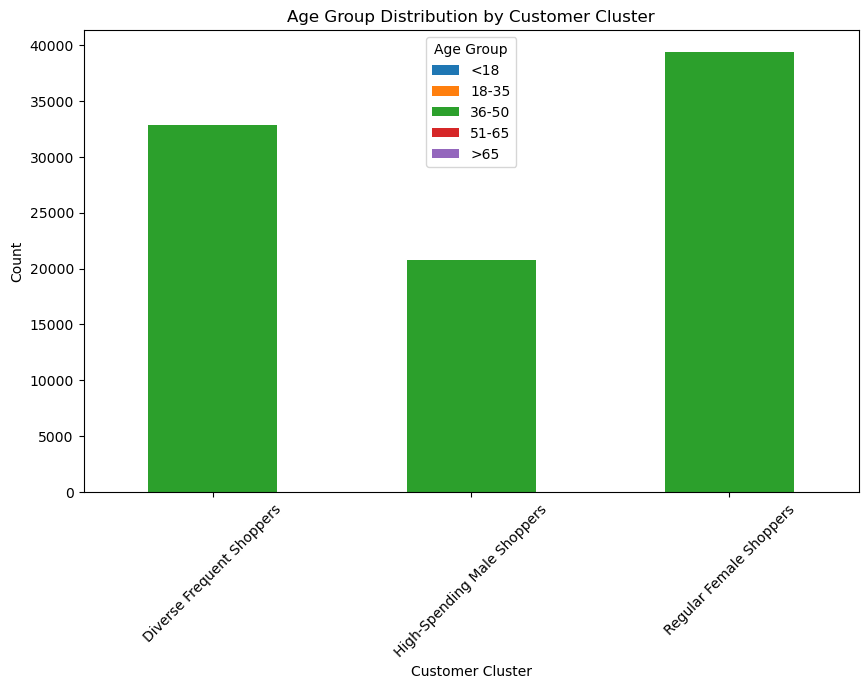

In [141]:
#Visualizing Age Distribution
age_group_distribution = merged2_data_df.groupby(['CustomerCluster', 'Original_AgeGroup']).size().unstack().fillna(0)
age_group_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Age Group Distribution by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

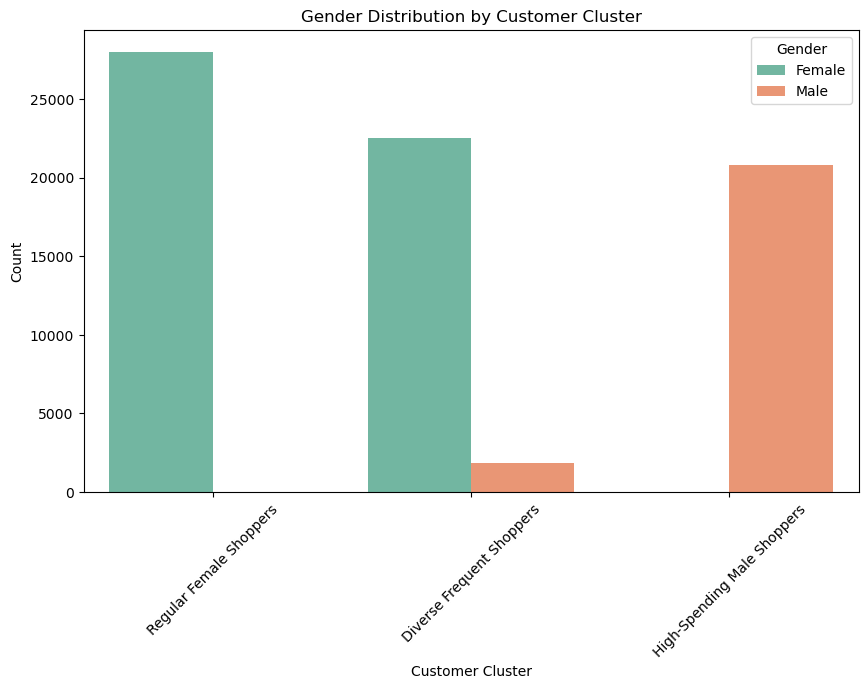

In [142]:
#Visualizing Gender Distribution
filtered_data = merged2_data_df[merged2_data_df['Original_Gender'] != 'Unknown']

#Visualizing Gender Distribution without 'Unknown' Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerCluster', hue='Original_Gender', data=filtered_data, palette='Set2')
plt.title('Gender Distribution by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<Figure size 1000x600 with 0 Axes>

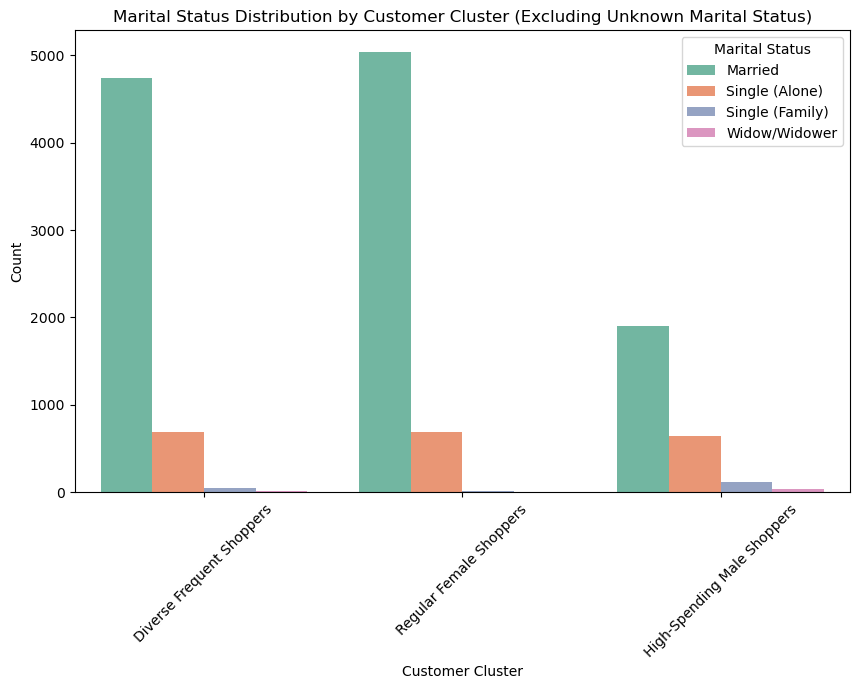

In [145]:
# Visualizing Marital Status Distribution
filtered_data = merged2_data_df[merged2_data_df['MaritalStatus'] != 'Unknown']

# Visualizing Marital Status Distribution without 'Unknown' Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerCluster', hue='MaritalStatus', data=filtered_data, palette='Set2')
plt.title('Marital Status Distribution by Customer Cluster (Excluding Unknown Marital Status)')
plt.xlabel('Customer Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

#### Insights from above

The age group is dominant for 36-50 for all customer segments. With most males and females as married. 

### Temporal Analysis

Temporal Analysis of Shopping Patterns by Customer Cluster:
                CustomerCluster    Weekday  Count
0     Diverse Frequent Shoppers     Monday   8312
1     Diverse Frequent Shoppers  Wednesday   4771
2     Diverse Frequent Shoppers   Thursday   4321
3     Diverse Frequent Shoppers     Friday   4435
4     Diverse Frequent Shoppers   Saturday   5146
5     Diverse Frequent Shoppers     Sunday   5835
6   High-Spending Male Shoppers     Monday   4419
7   High-Spending Male Shoppers  Wednesday   3071
8   High-Spending Male Shoppers   Thursday   3344
9   High-Spending Male Shoppers     Friday   2964
10  High-Spending Male Shoppers   Saturday   3416
11  High-Spending Male Shoppers     Sunday   3595
12      Regular Female Shoppers     Monday   7352
13      Regular Female Shoppers  Wednesday   6529
14      Regular Female Shoppers   Thursday   6290
15      Regular Female Shoppers     Friday   6159
16      Regular Female Shoppers   Saturday   6906
17      Regular Female Shoppers     Sund

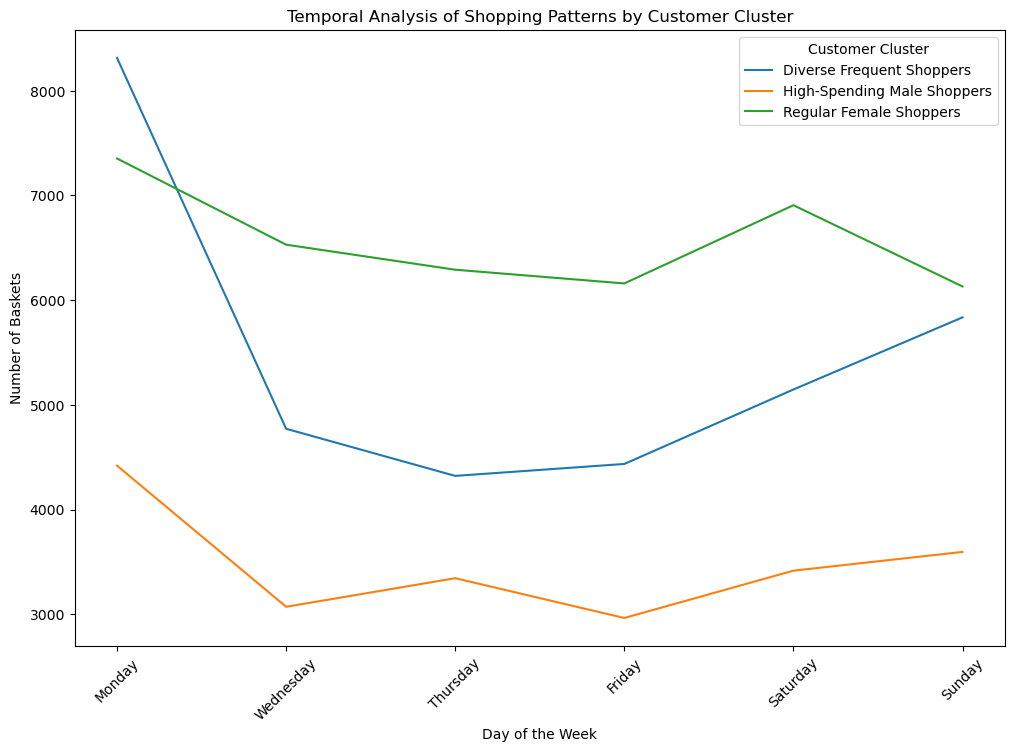

In [146]:
#Temporal Analysis
temporal_data = merged2_data_df.groupby(['CustomerCluster', 'Weekday']).size().reset_index(name='Count')

#Rename the clusters
temporal_data['CustomerCluster'] = temporal_data['CustomerCluster'].replace({
    0: 'High-Spending Male Shoppers',  
    1: 'Regular Female Shoppers',     
    2: 'Diverse Frequent Shoppers'    
})

#Map the 'Weekday' numbers to day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temporal_data['Weekday'] = temporal_data['Weekday'].apply(lambda x: days[x])

#Printing the aggregated data
print("Temporal Analysis of Shopping Patterns by Customer Cluster:")
print(temporal_data)

#Line Chart for Temporal Analysis
plt.figure(figsize=(12, 8))
sns.lineplot(x='Weekday', y='Count', hue='CustomerCluster', data=temporal_data)
plt.title('Temporal Analysis of Shopping Patterns by Customer Cluster')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Baskets')
plt.xticks(rotation=45)
plt.legend(title='Customer Cluster')
plt.show()

#### Insights from above

Diverse Frequent Shoppers are most active on Mondays, with a noticeable drop mid-week and a rebound during the weekend.

High-Spending Male Shoppers show a consistent pattern with a slight uptick in activity towards the weekend, peaking on Sundays.

Regular Female Shoppers have high counts on Mondays, with a gradual decrease through the week, but less variance than other clusters.

### Product Category-A Analysis

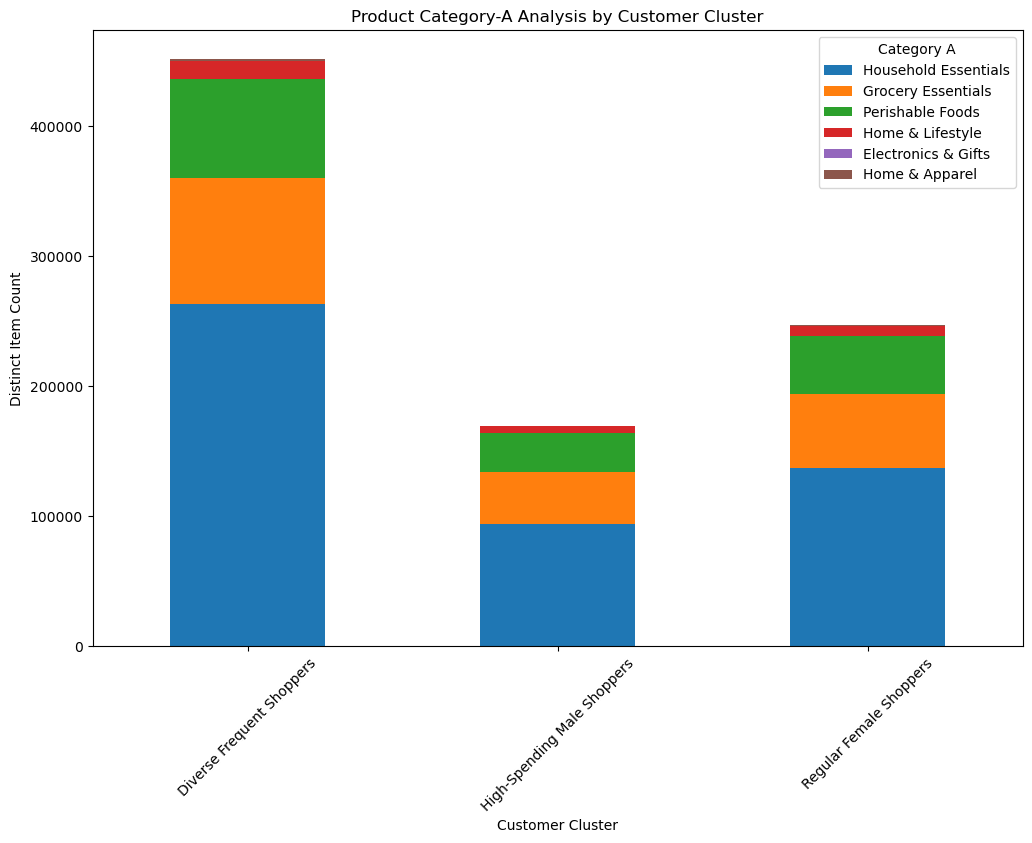

In [147]:
#Product Category-A Analysis
category_labels = {
    10: 'Household Essentials',
    20: "Grocery Essentials",
    30: "Perishable Foods",
    40: "Home & Lifestyle",
    50: "Electronics & Gifts",
    60: "Home & Apparel",
    90: "Telephone"  
}

merged2_data_df['CustomerCluster'] = merged2_data_df['CustomerCluster'].replace({
    0: 'High-Spending Male Shoppers',
    1: 'Regular Female Shoppers',
    2: 'Diverse Frequent Shoppers'
})

pivot_data = merged2_data_df.pivot_table(index='CustomerCluster', columns='CategoryA', values='Distinct_Item_Count', aggfunc='sum')

#Renaming columns using the category_labels dictionary
pivot_data.columns = [category_labels.get(int(col), col) for col in pivot_data.columns]

#Plotting the data
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Category-A Analysis by Customer Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Distinct Item Count')
plt.xticks(rotation=45)
plt.legend(title='Category A', loc='upper right')
plt.show()

#### Insights from above

Diverse Frequent Shoppers dominate in all categories, with the highest counts in Household Essentials and Grocery Essentials, and significant counts in Perishable Foods, Home & Lifestyle and other categories.

High-Spending Male Shoppers show a good liking towards for Household Essentials, with Grocery and Perishable Foods being secondary choices and minimal interest in other categories.

Regular Female Shoppers follow a similar pattern to Male Shoppers but at a lower volume across all categories, showing a clear focus on Household Essentials.